In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv(r"BERT Dataset.csv",encoding='latin1')
df = df1.copy()
df.head()

Sentences  \
0  excellent service....very professional electri...   
1                                  nice and good app   
2          came on time work proeffetionaly complete   
3                first time user and very satisfied.   
4          nice facilities and rates is to much high   

                                    Broken Sentences       OpinionTerm1  \
0  ['excellent service', '.very professional elec...  excellent service   
1                              ['nice and good app']           good app   
2   ['came on time', 'work proeffetionaly complete']            on time   
3            ['first time user ', ' very satisfied']    first time user   
4     ['nice facilities ', ' rates is to much high']    nice facilities   

  Predicted Opinion Term 1   Aspect Category1 AspectPolarity1   \
0        excellent service    Company_Service         positive   
1                 good app        App_Utility         positive   
2                  on time   service_schedule         positive   
3               first time  App_Functionality         positive   
4          nice facilities    Company_Service         positive   

                OpinionTerm2  Predicted Opinion Term 2  \
0  professional electricians  professional electrician   
1                        NaN                       NaN   
2        work proeffetionaly       work proeffetionaly   
3                  satisfied            very satisfied   
4                  much high                   to much   

          Aspect Category2 Aspectpolarity2  
0  service_person_attitude       positive   
1                      NaN             NaN  
2  service_person_attitude       positive   
3          Company_Service        positive  
4                     cost       negative

### Duplicate Check

In [11]:
df.shape

(4164, 10)

In [12]:
df_dup = df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [13]:
df_dup.shape

(3082, 10)

In [14]:
print(df_dup.isnull().sum())
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_dup[feature].isnull().mean(), 2),  ' % missing values')

Sentences                      0
Broken Sentences               0
OpinionTerm1                   1
Predicted Opinion Term 1     167
Aspect Category1               0
AspectPolarity1                0
OpinionTerm2                2361
Predicted Opinion Term 2    1914
Aspect Category2            2359
Aspectpolarity2             2343
dtype: int64
Predicted Opinion Term 1 0.05  % missing values
OpinionTerm2 0.77  % missing values
Predicted Opinion Term 2 0.62  % missing values
Aspect Category2 0.77  % missing values
Aspectpolarity2 0.76  % missing values


The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Inspection

In [15]:
df_dup.shape

(3082, 10)

In [16]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 0 to 4163
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sentences                 3082 non-null   object
 1   Broken Sentences          3082 non-null   object
 2   OpinionTerm1              3081 non-null   object
 3   Predicted Opinion Term 1  2915 non-null   object
 4   Aspect Category1          3082 non-null   object
 5   AspectPolarity1           3082 non-null   object
 6   OpinionTerm2              721 non-null    object
 7   Predicted Opinion Term 2  1168 non-null   object
 8   Aspect Category2          723 non-null    object
 9   Aspectpolarity2           739 non-null    object
dtypes: object(10)
memory usage: 264.9+ KB


In [17]:
df_dup.describe()

Sentences       Broken Sentences  OpinionTerm1  \
count               3082                   3082          3081   
unique              2494                   2404           977   
top     Very bad service  ['excellent service']  good service   
freq                   8                     14           235   

       Predicted Opinion Term 1 Aspect Category1 AspectPolarity1   \
count                      2915             3082             3082   
unique                      851               22                4   
top                good service  Company_Service         positive   
freq                        235             1605             1279   

        OpinionTerm2 Predicted Opinion Term 2 Aspect Category2 Aspectpolarity2  
count            721                     1168              723             739  
unique           458                      766               21               5  
top     good service            urban company  Company_Service        Positive  
freq              21                       35              160             281

In [18]:
# Print data types of each column
print(df_dup.dtypes)

Sentences                   object
Broken Sentences            object
OpinionTerm1                object
Predicted Opinion Term 1    object
Aspect Category1            object
AspectPolarity1             object
OpinionTerm2                object
Predicted Opinion Term 2    object
Aspect Category2            object
Aspectpolarity2             object
dtype: object


In [19]:
df_dup.describe()

Sentences       Broken Sentences  OpinionTerm1  \
count               3082                   3082          3081   
unique              2494                   2404           977   
top     Very bad service  ['excellent service']  good service   
freq                   8                     14           235   

       Predicted Opinion Term 1 Aspect Category1 AspectPolarity1   \
count                      2915             3082             3082   
unique                      851               22                4   
top                good service  Company_Service         positive   
freq                        235             1605             1279   

        OpinionTerm2 Predicted Opinion Term 2 Aspect Category2 Aspectpolarity2  
count            721                     1168              723             739  
unique           458                      766               21               5  
top     good service            urban company  Company_Service        Positive  
freq              21                       35              160             281

# Data Cleaning

Null Percentage: Columns

In [22]:
(df_dup.isnull().sum() * 100 / len(df_dup)).value_counts(ascending=False)

0.000000     4
0.032446     1
5.418559     1
76.606100    1
62.102531    1
76.541207    1
76.022064    1
Name: count, dtype: int64

Null Count: Columns

In [23]:
df_dup.isnull().sum().value_counts(ascending=False)

0       4
1       1
167     1
2361    1
1914    1
2359    1
2343    1
Name: count, dtype: int64

Null Percentage: Rows

In [24]:
(df_dup.isnull().sum(axis=1) * 100 / len(df_dup)).value_counts(ascending=False)

0.0    2582
dtype: int64

Null Count: Rows

In [25]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    2582
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

## Data Preparation

Derived Metrices

In [26]:
df.head()

Player       Span  Mat  Inns  Balls   Runs  Wkts  \
0  M Muralitharan (Asia/ICC/SL)  1993-2011  350   341  18811  12326   534   
1             Wasim Akram (PAK)  1984-2003  356   351  18186  11812   502   
2            Waqar Younis (PAK)  1989-2003  262   258  12698   9919   416   
3          WPUJC Vaas (Asia/SL)  1994-2008  322   320  15775  11014   400   
4  Shahid Afridi (Asia/ICC/PAK)  1996-2015  398   372  17670  13632   395   

    BBI    Ave  Econ    SR   4   5  
0  7/30  23.08  3.93  35.2  15  10  
1  5/15  23.52  3.89  36.2  17   6  
2  7/36  23.84  4.68  30.5  14  13  
3  8/19  27.53  4.18  39.4   9   4  
4  7/12  34.51  4.62  44.7   4   9

In [27]:
df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [28]:
# Split the 'Span' column into 'Strt' and 'End'
df[['Strt', 'End']] = df['Span'].str.split("-", expand=True)

# Convert 'Strt' and 'End' to integers
df[['Strt', 'End']] = df[['Strt', 'End']].astype(int)

# Calculate the 'Exp' column
df['Exp'] = df['End'] - df['Strt']

# Drop 'Strt', 'End', and 'Span' columns
df = df.drop(['Strt', 'End', 'Span'], axis=1)

# Display the modified DataFrame
print(df.head())

                         Player  Mat  Inns  Balls   Runs  Wkts   BBI    Ave  \
0  M Muralitharan (Asia/ICC/SL)  350   341  18811  12326   534  7/30  23.08   
1             Wasim Akram (PAK)  356   351  18186  11812   502  5/15  23.52   
2            Waqar Younis (PAK)  262   258  12698   9919   416  7/36  23.84   
3          WPUJC Vaas (Asia/SL)  322   320  15775  11014   400  8/19  27.53   
4  Shahid Afridi (Asia/ICC/PAK)  398   372  17670  13632   395  7/12  34.51   

   Econ    SR   4   5  Exp  
0  3.93  35.2  15  10   18  
1  3.89  36.2  17   6   19  
2  4.68  30.5  14  13   14  
3  4.18  39.4   9   4   14  
4  4.62  44.7   4   9   19  


## Univariate Analysis

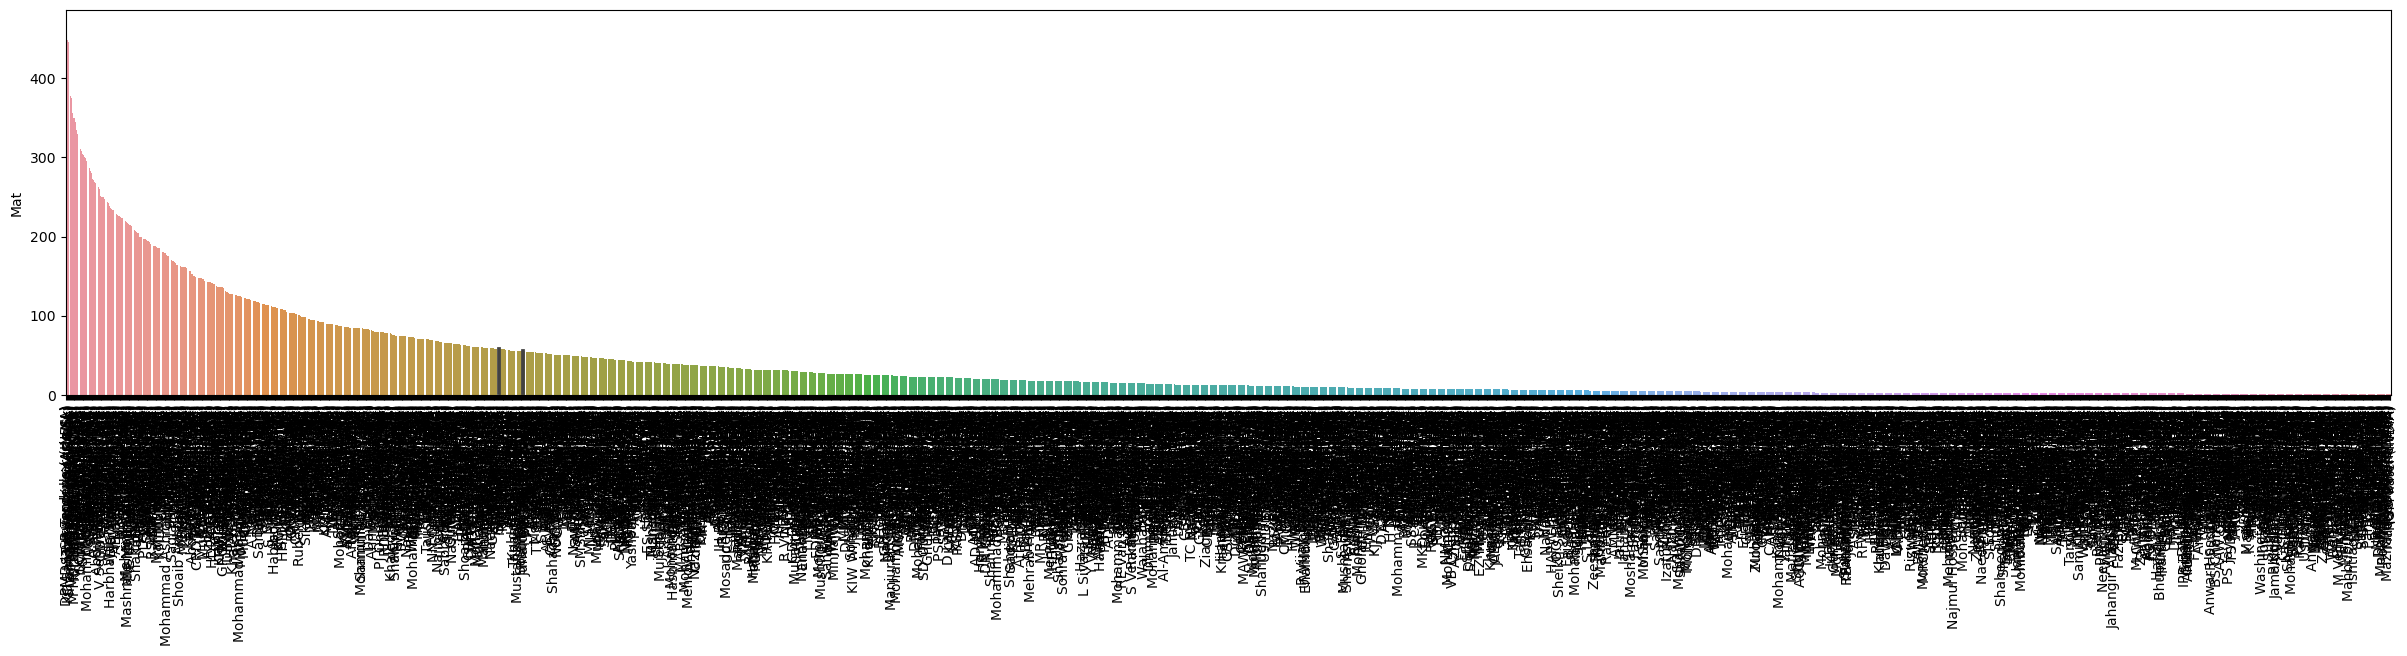

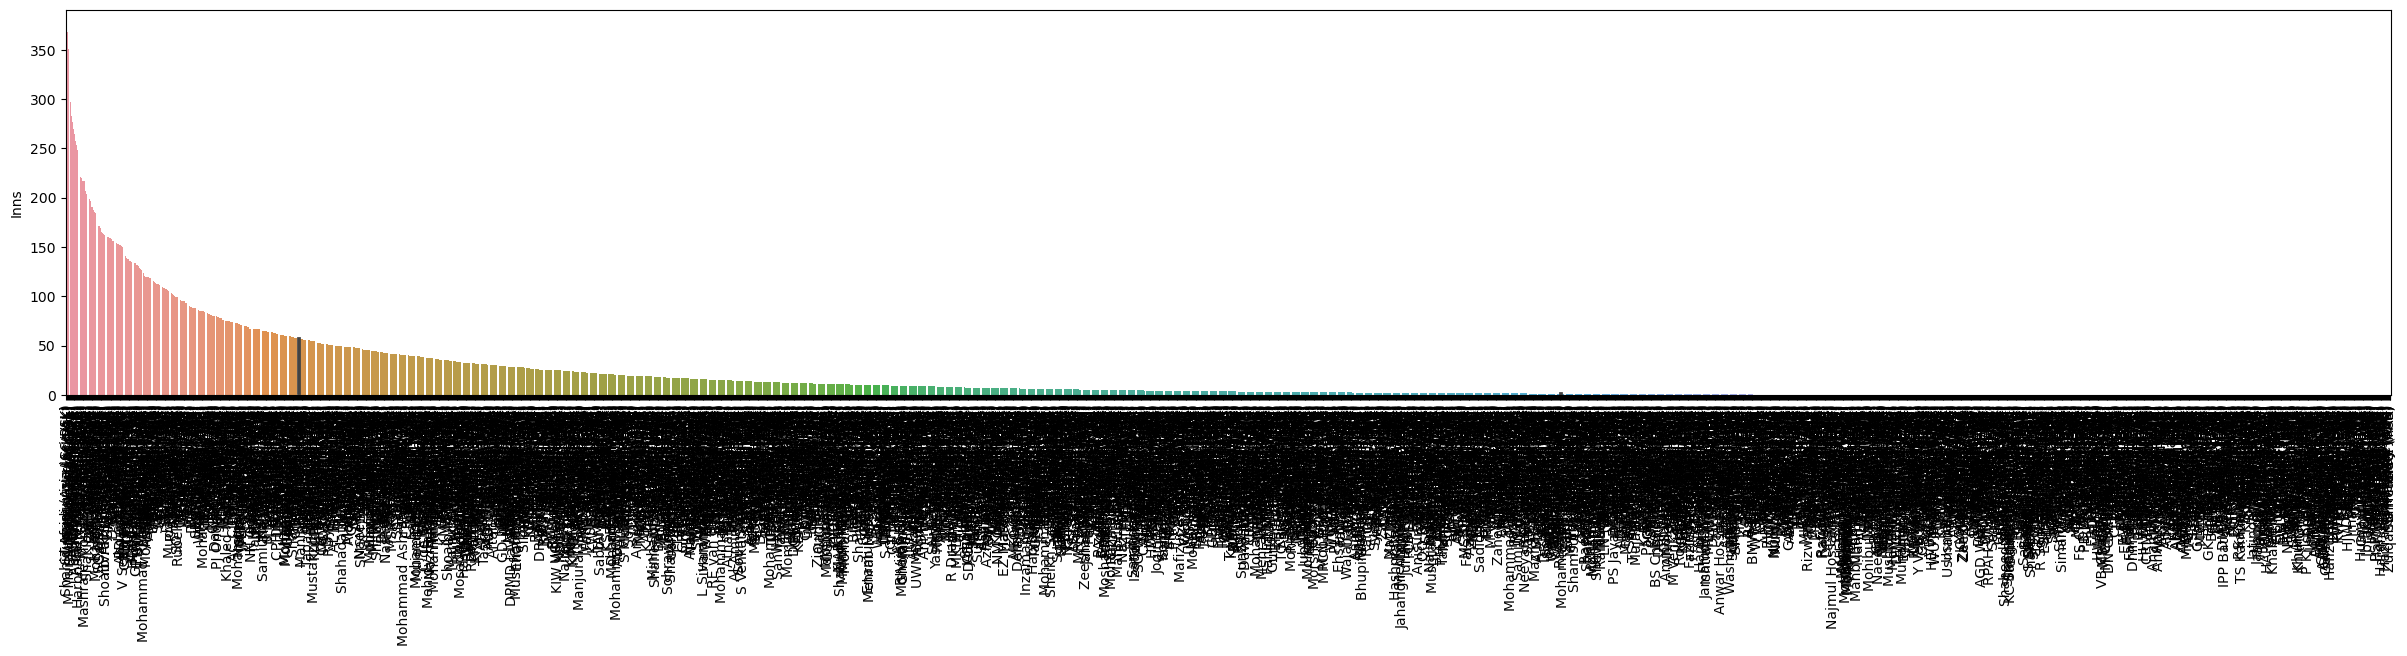

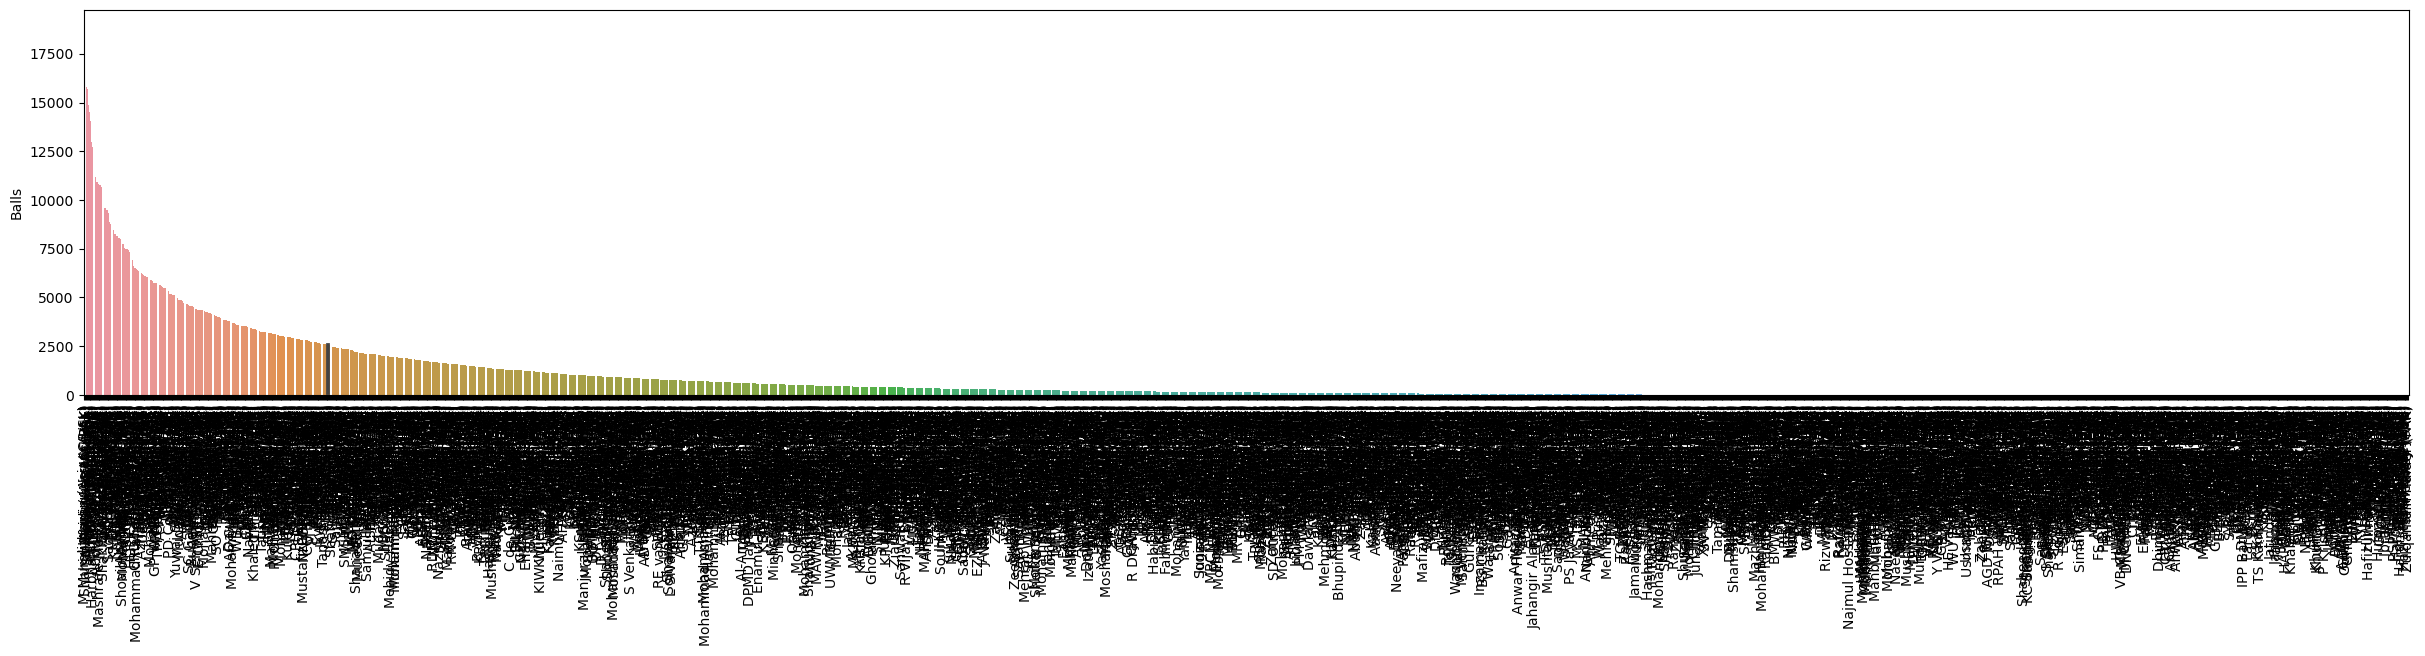

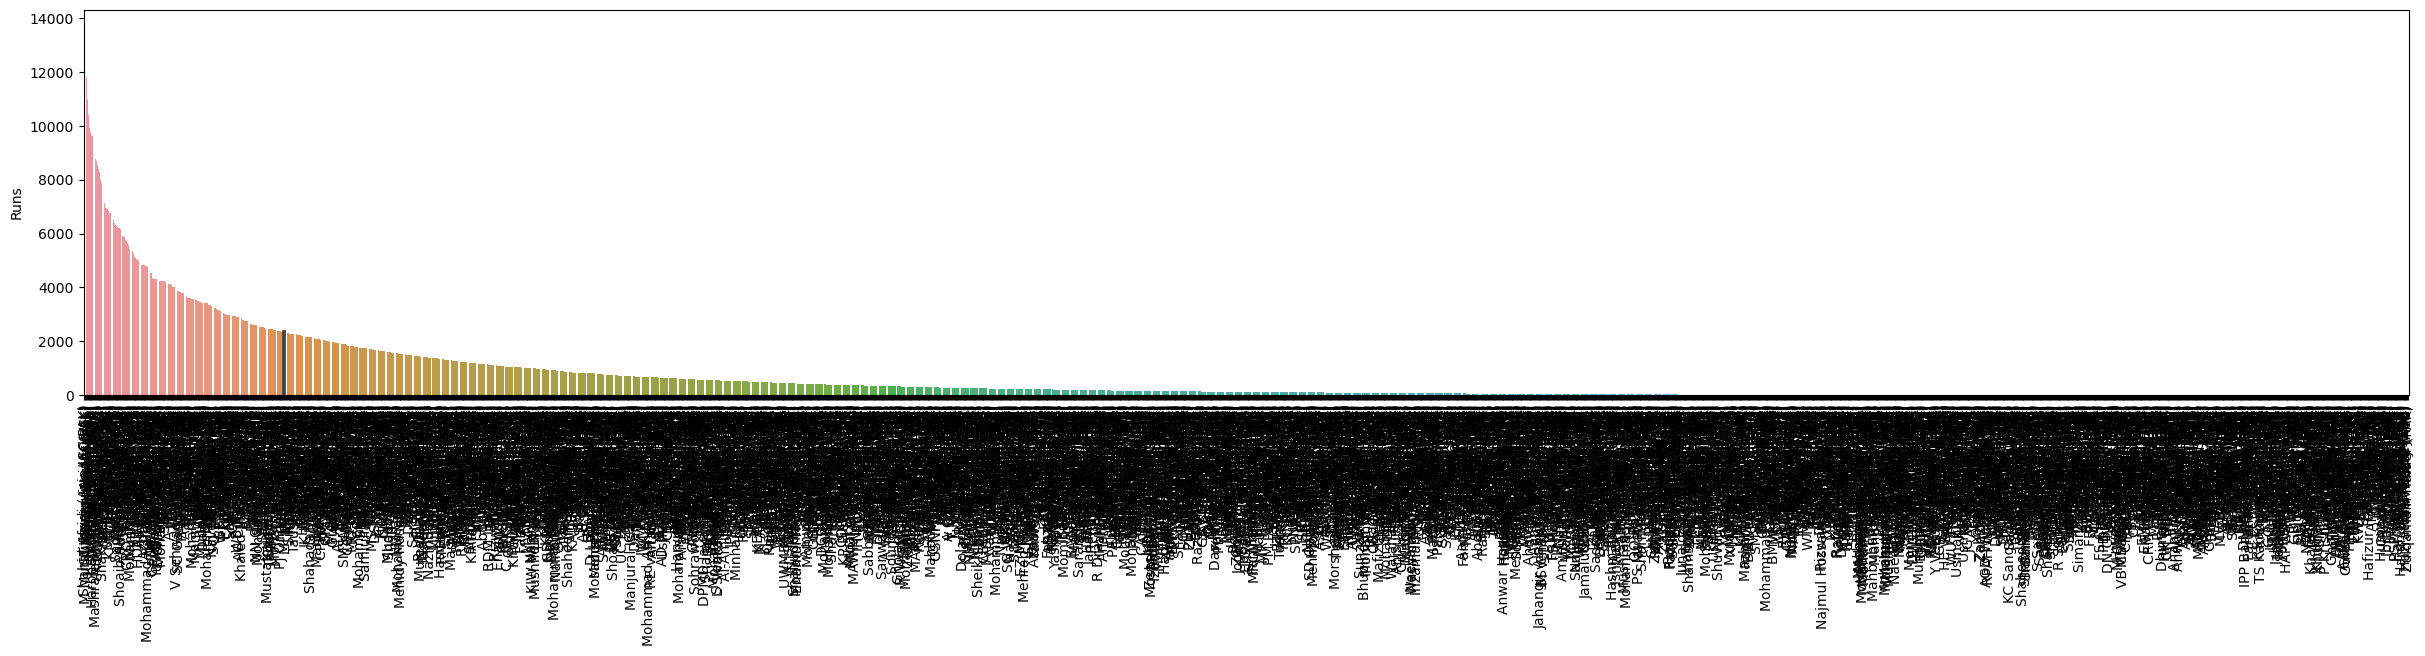

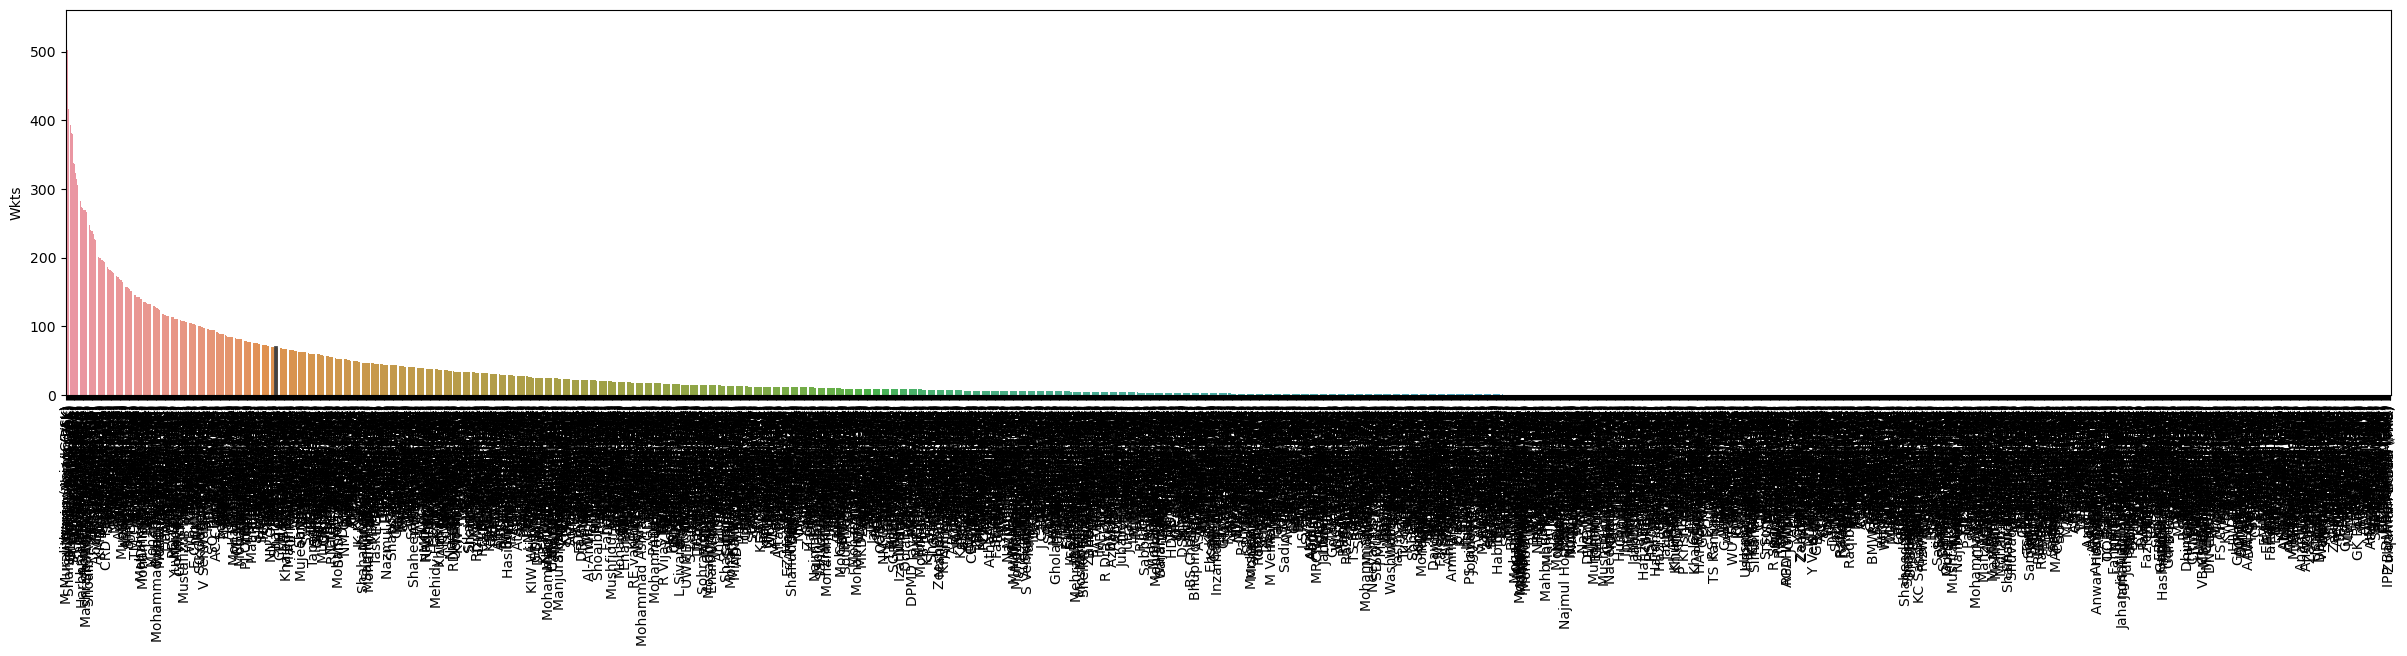

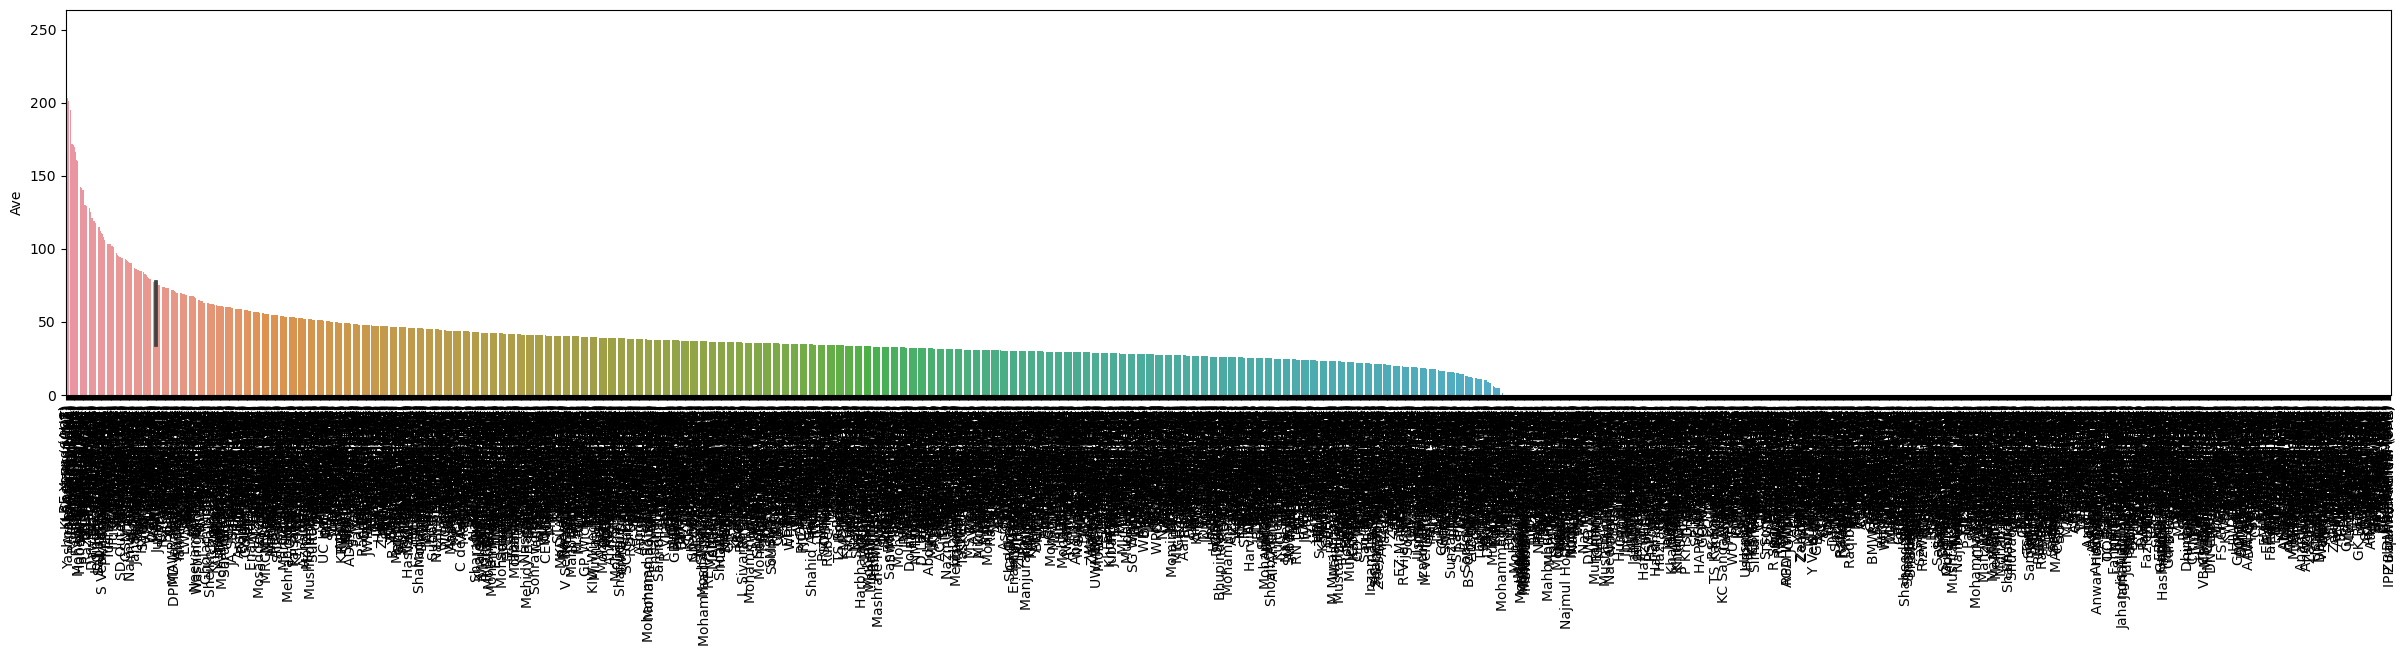

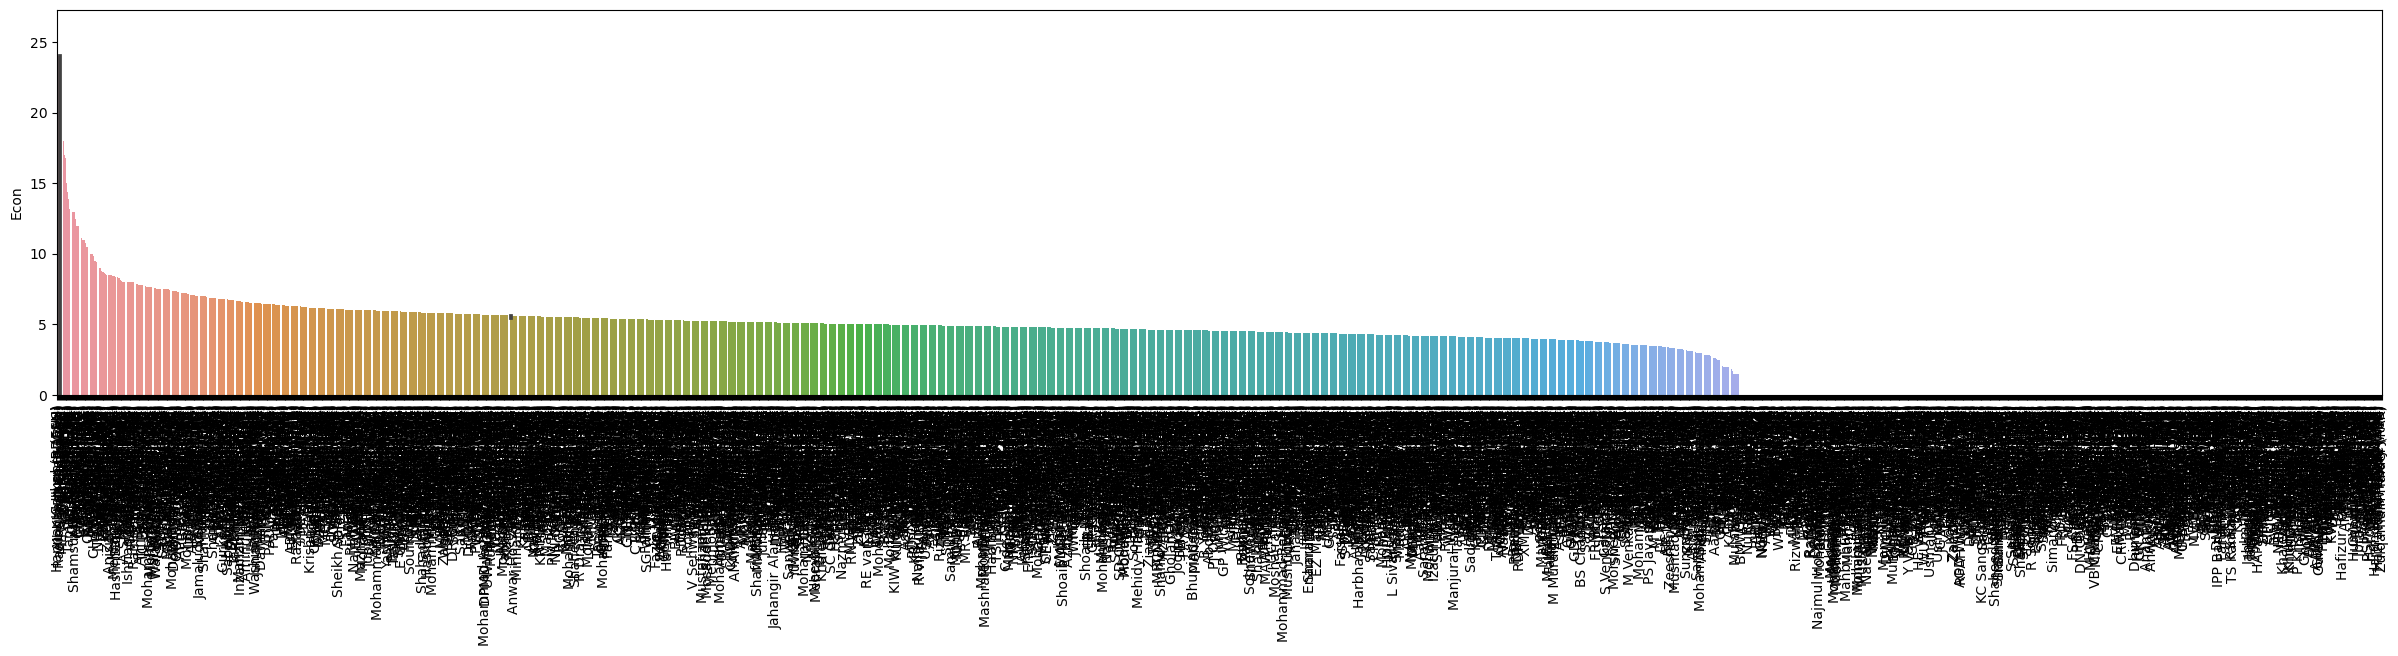

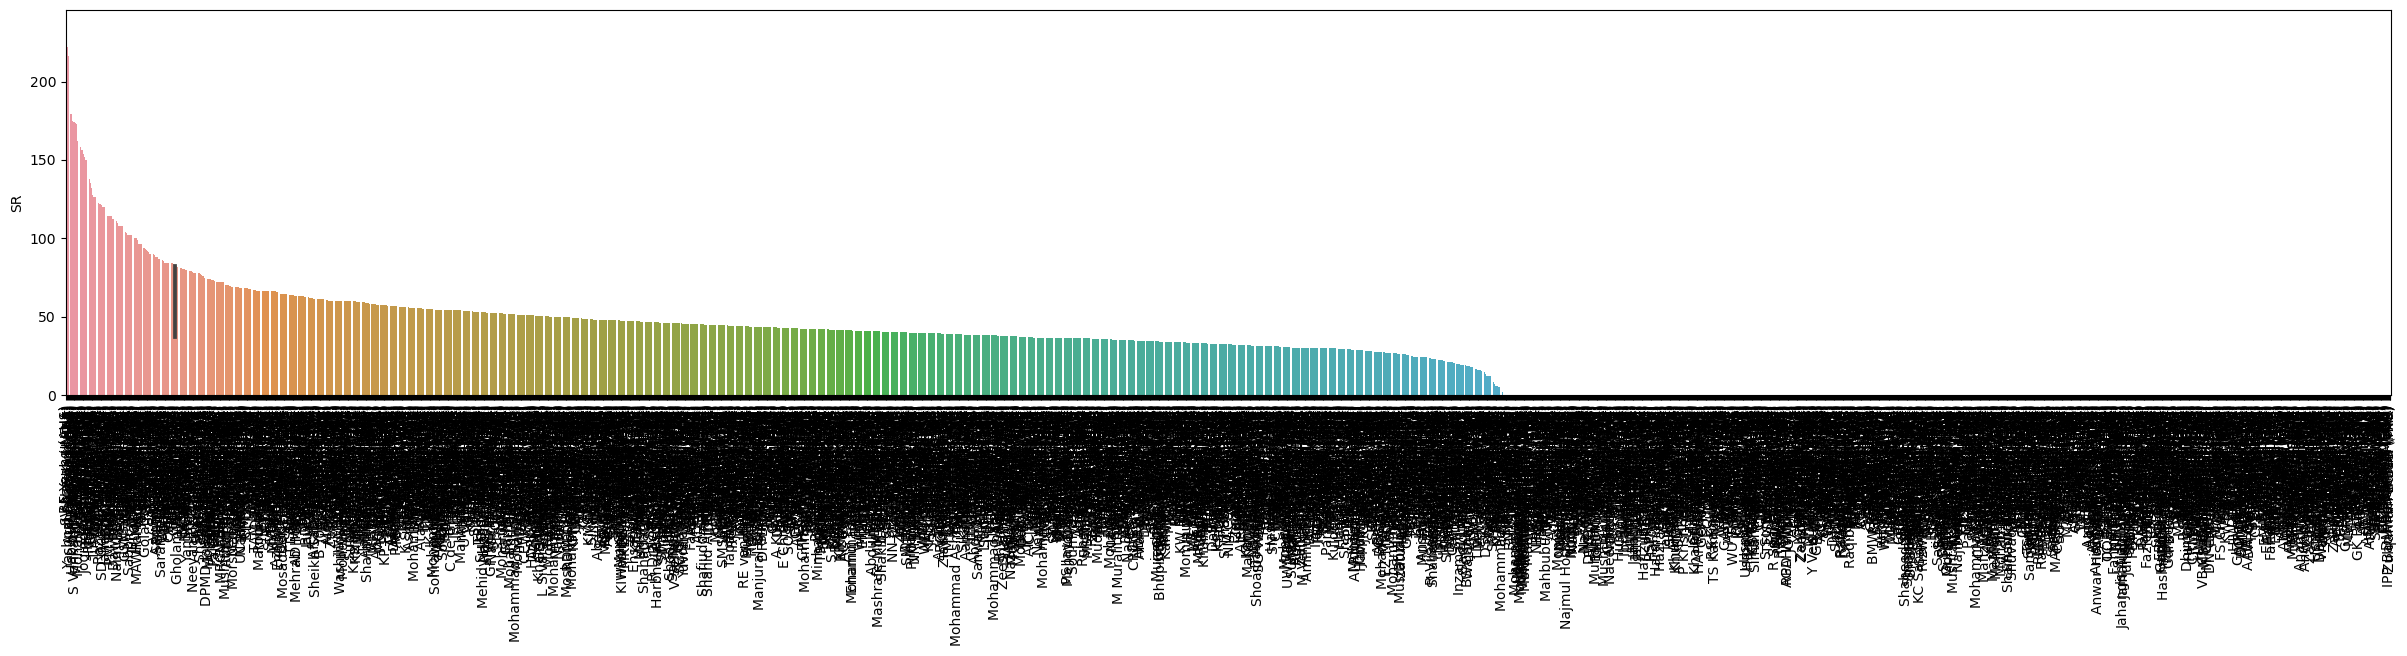

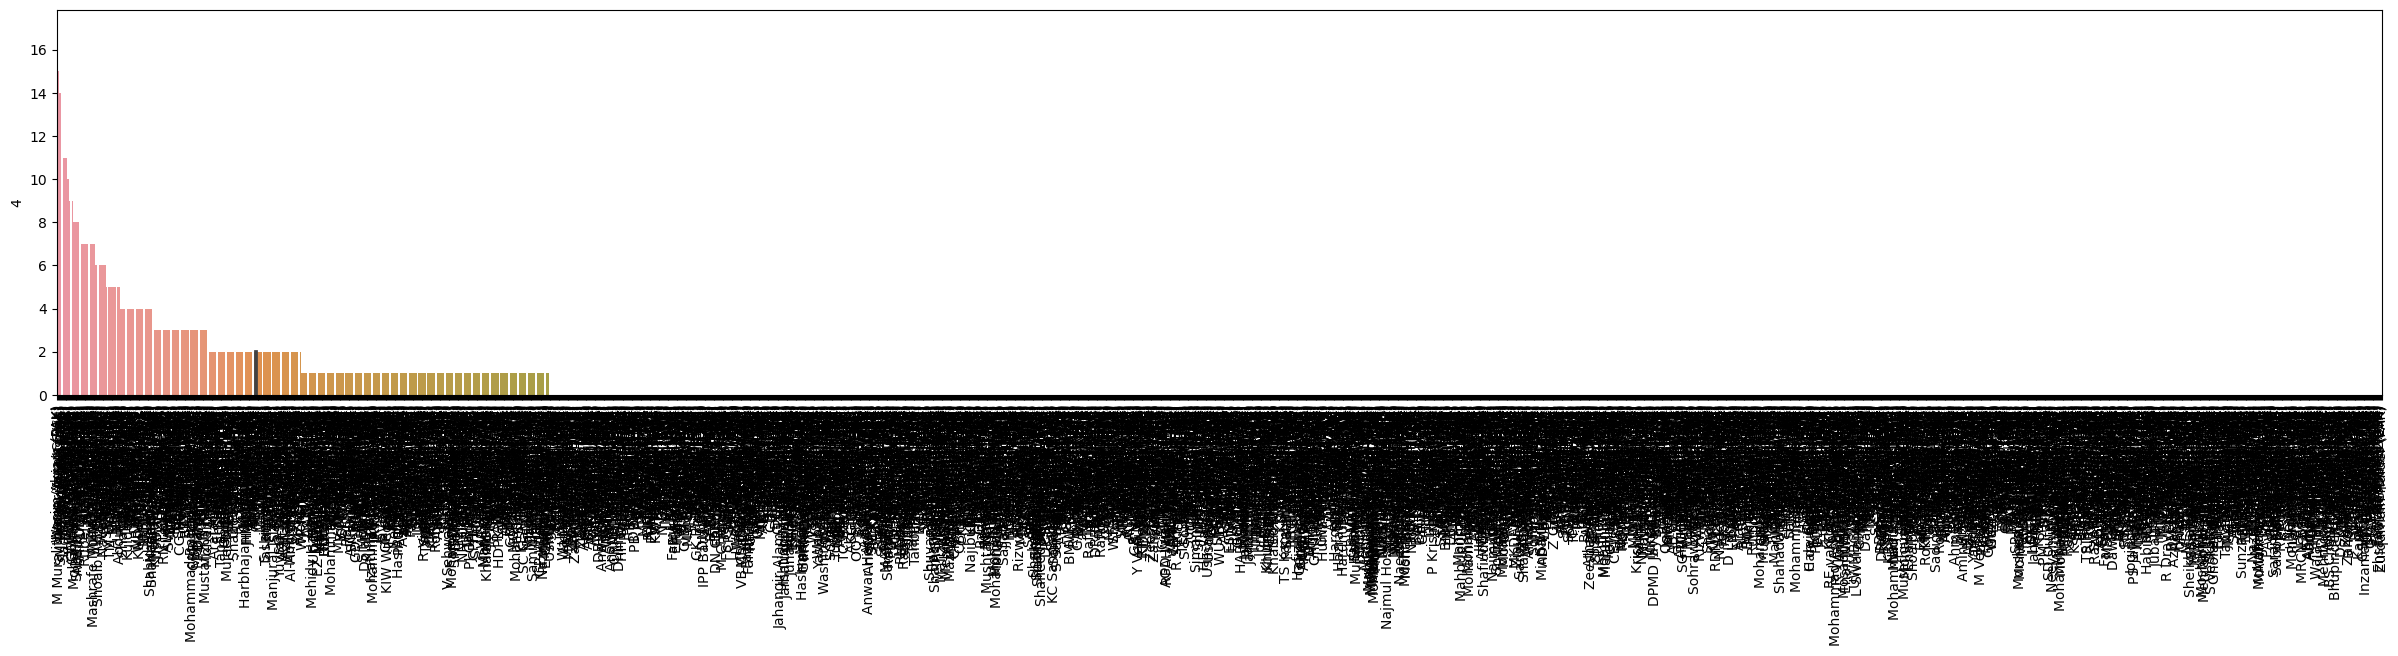

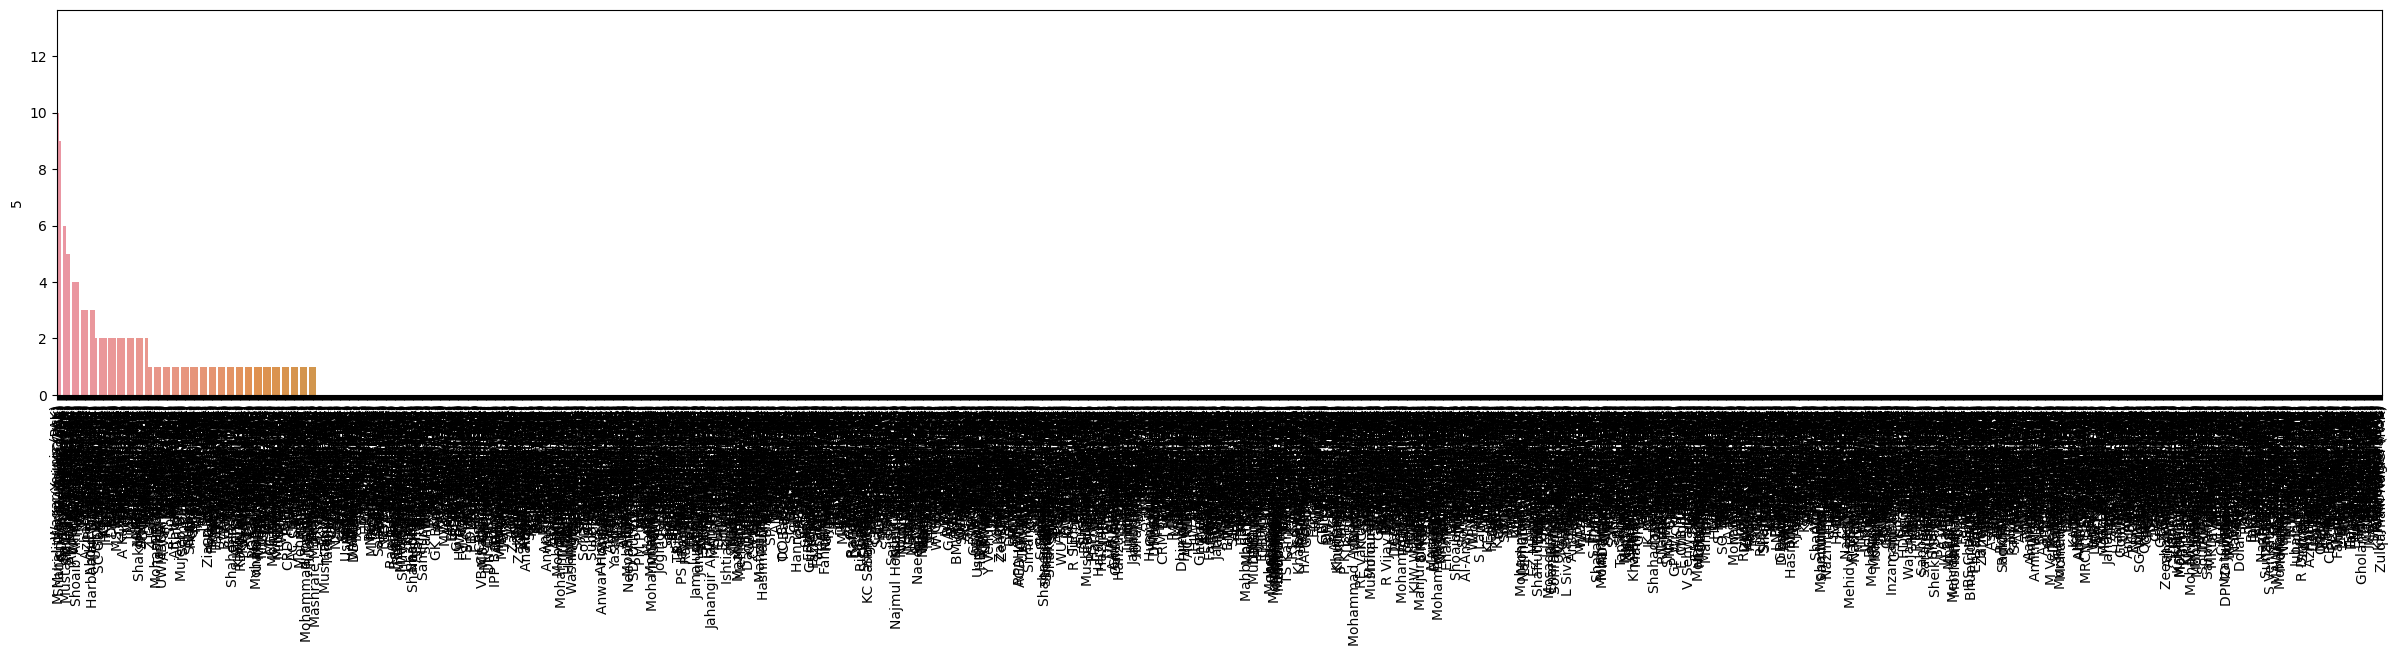

In [29]:
columns = ['Mat','Inns', 'Balls', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4', '5']
for column in columns:
    plt.figure(figsize = (30,5))
    mat = df[['Player',column]].sort_values(column, ascending = False)
    ax = sns.barplot(x='Player', y=column, data= mat)
    ax.set(xlabel = '', ylabel= column)
    plt.xticks(rotation=90)
    plt.show()

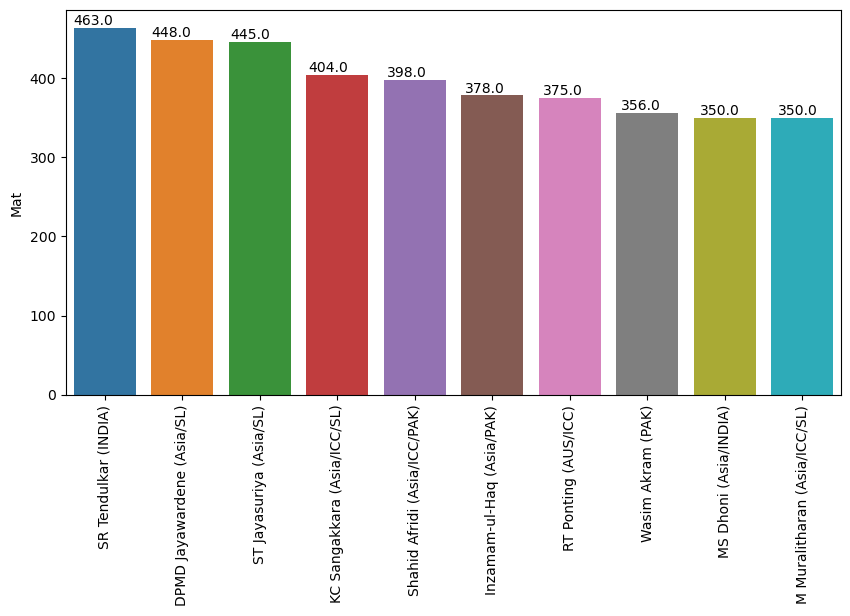

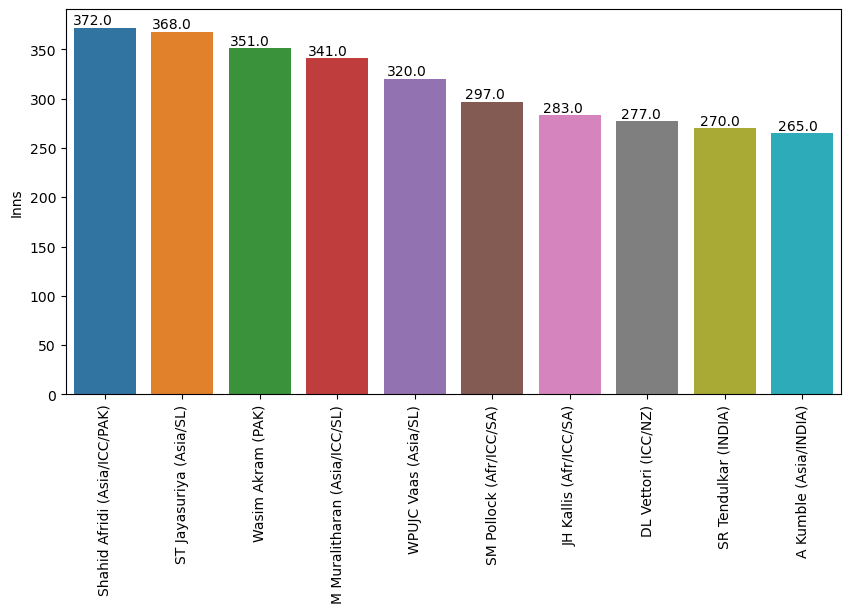

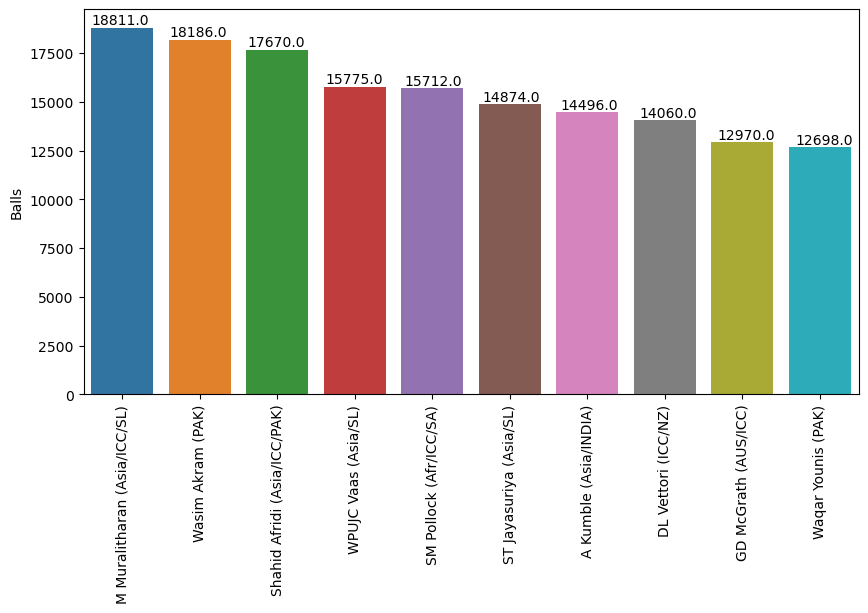

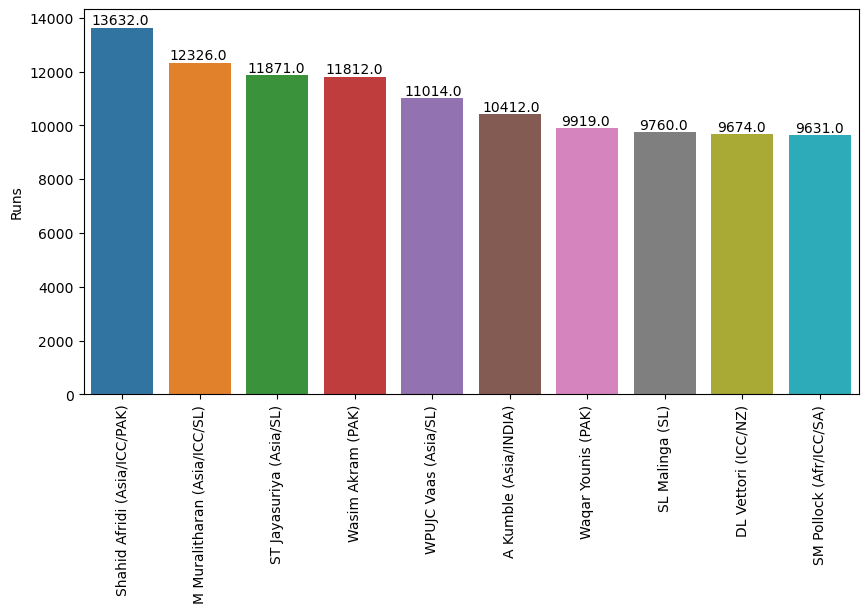

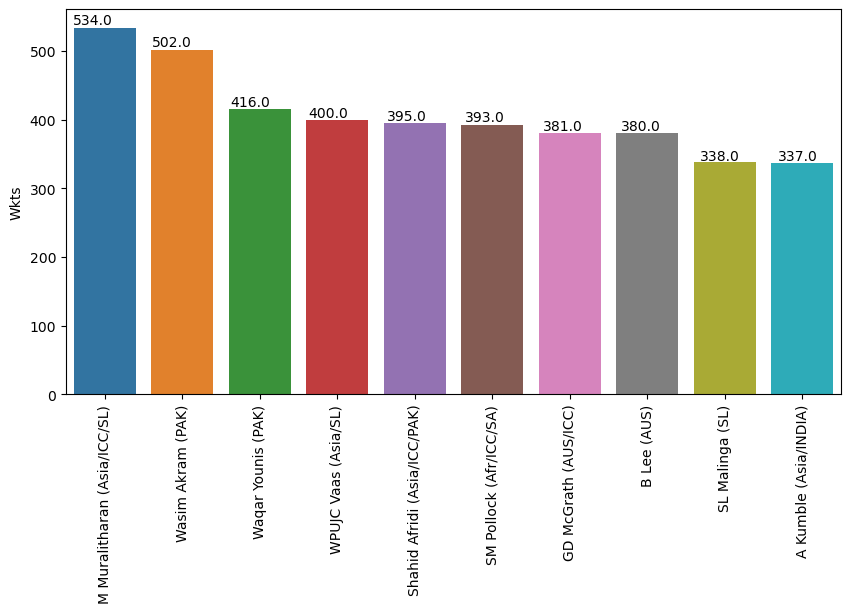

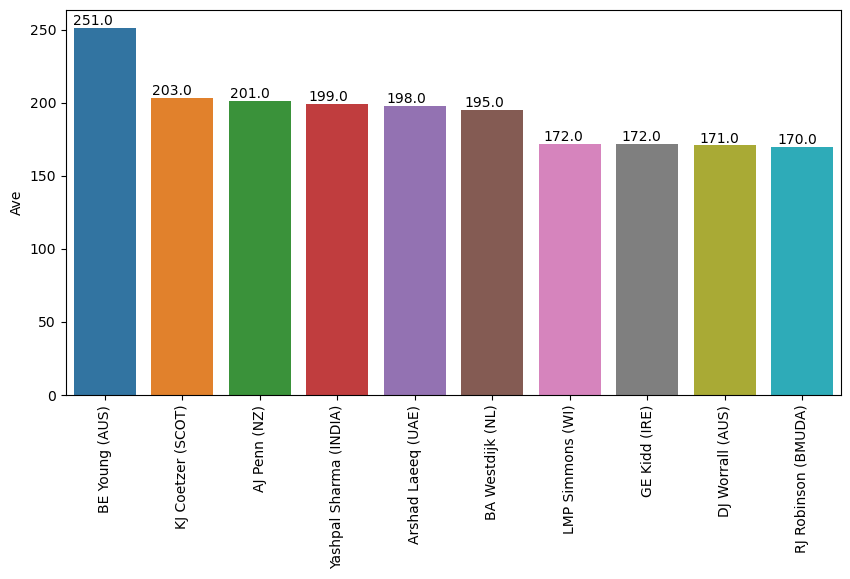

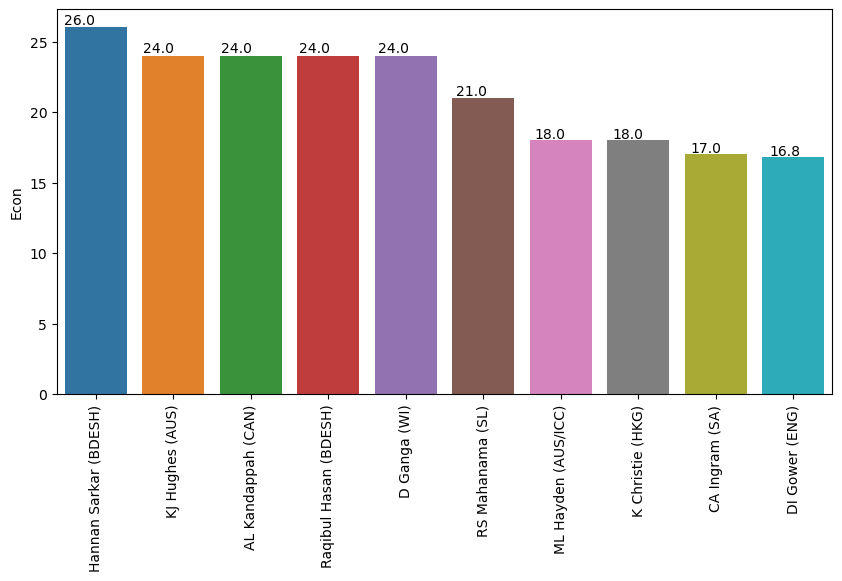

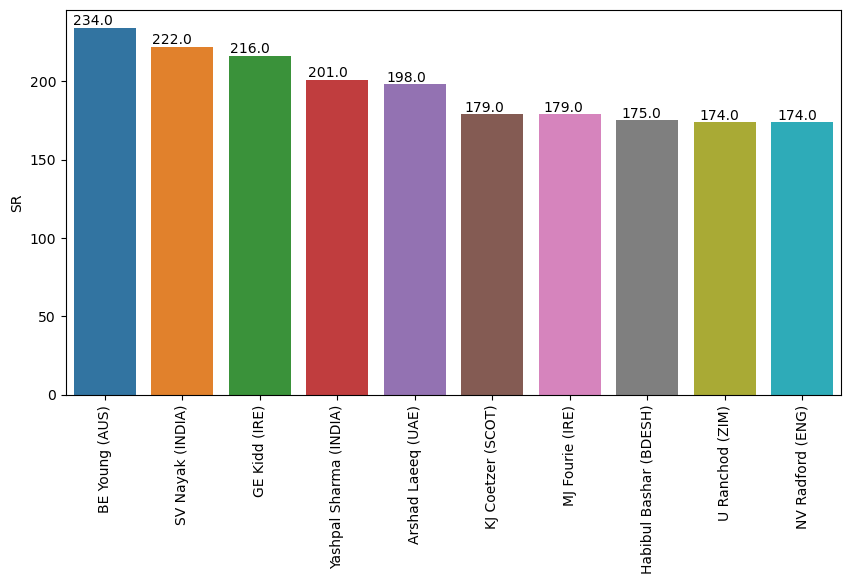

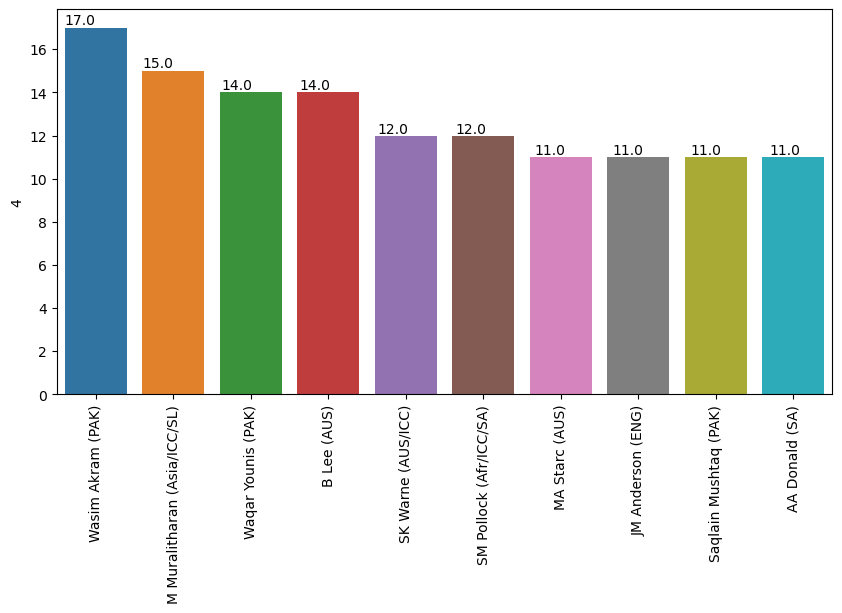

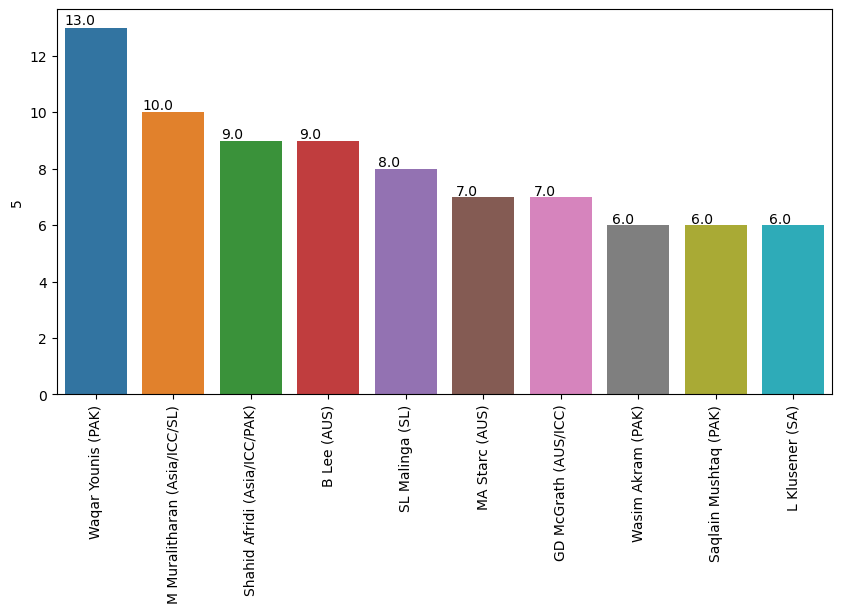

In [30]:
for column in columns:
    plt.figure(figsize = (10,5))
    mat_top10 = df[['Player',column]].sort_values(column, ascending = False).head(10)
    ax = sns.barplot(x='Player', y=column, data= mat_top10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel= column)
    plt.xticks(rotation=90)
    plt.show()

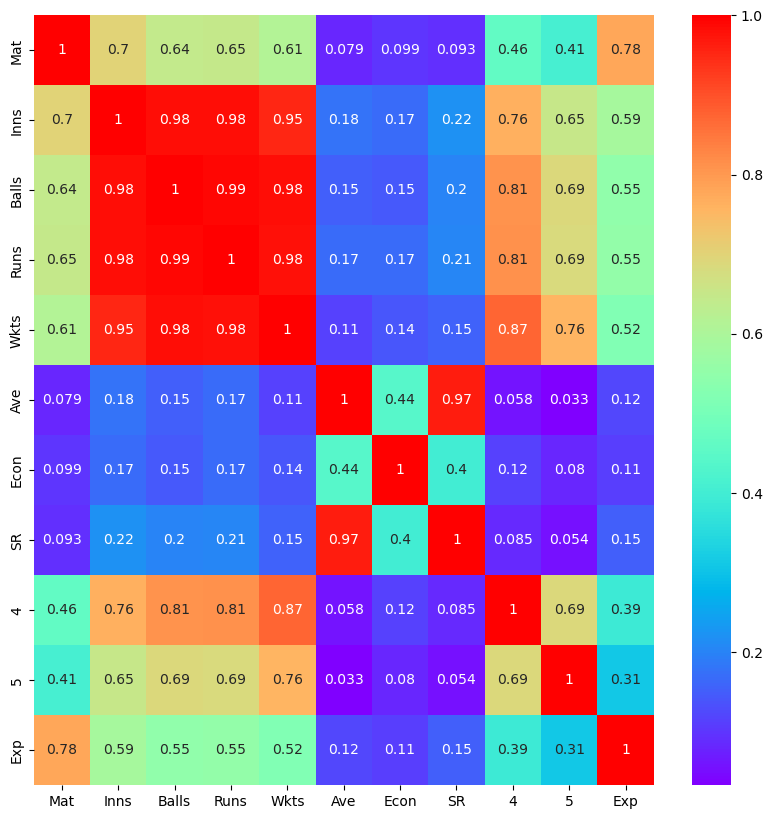

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

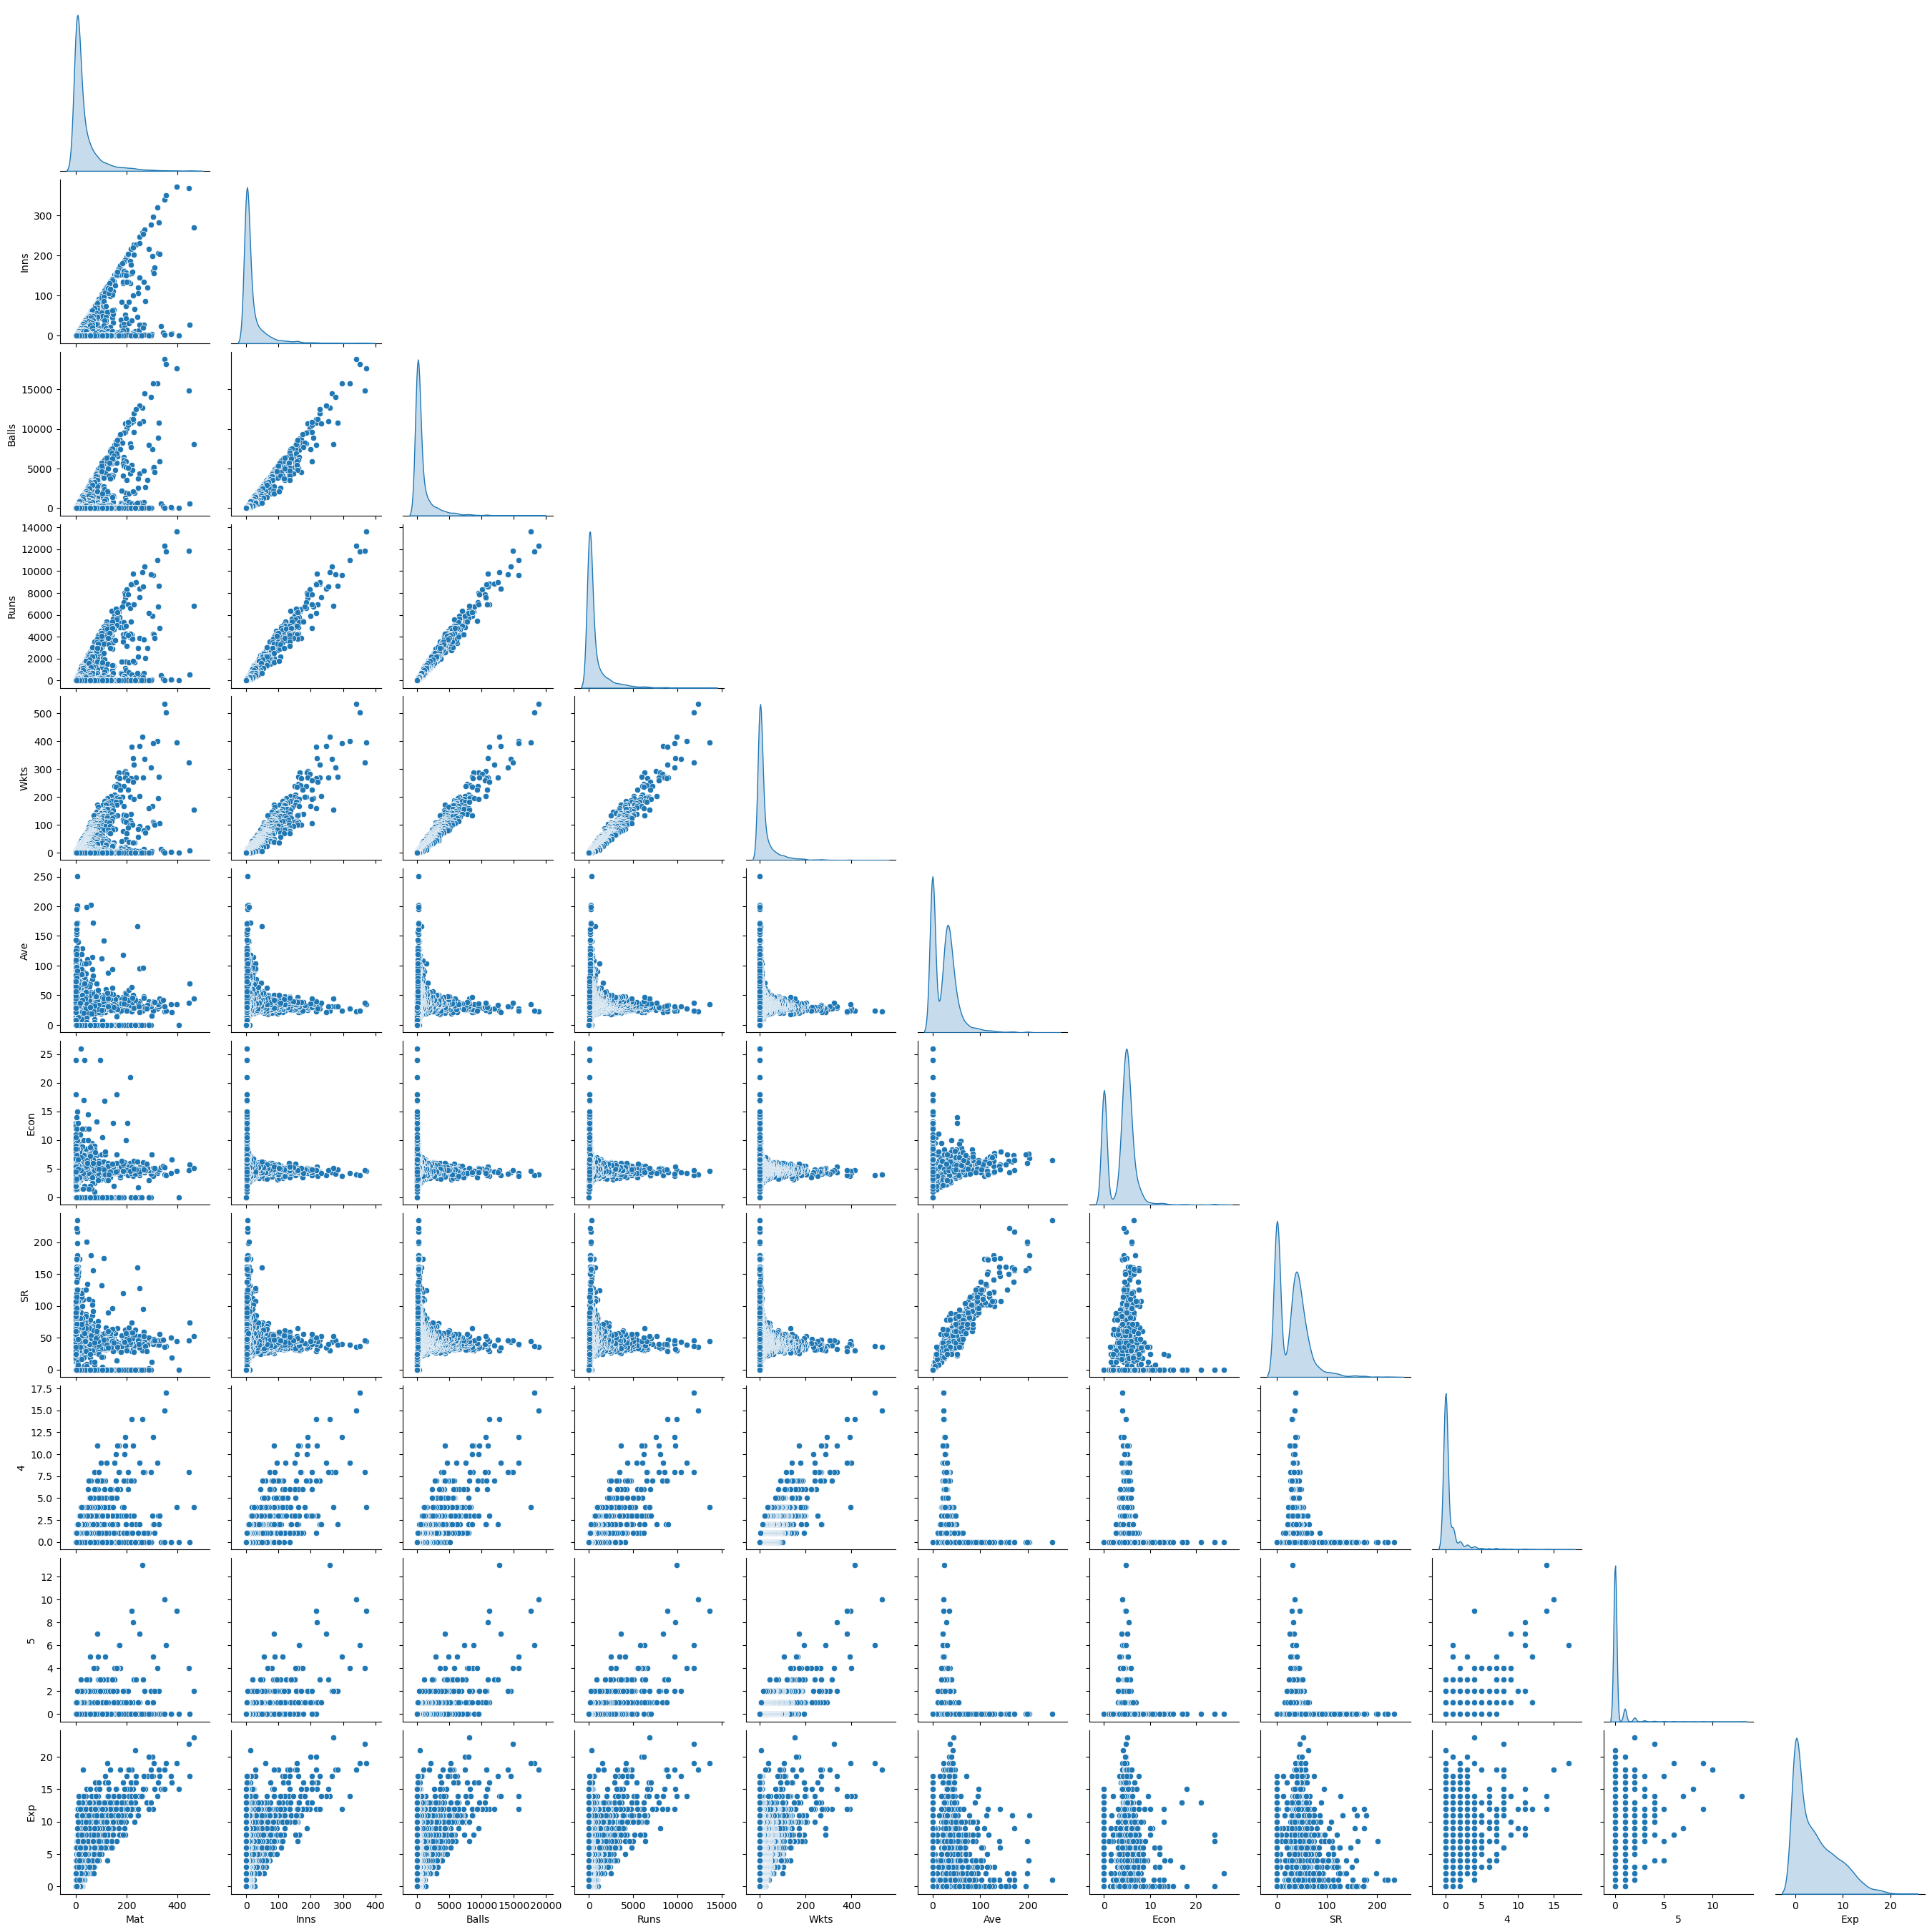

In [32]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

Outlier Analysis

In [33]:
df.describe()

Mat         Inns         Balls          Runs         Wkts  \
count  2582.00000  2582.000000   2582.000000   2582.000000  2582.000000   
mean     36.03718    19.431448    865.308675    678.481022    20.933772   
std      58.27430    39.640810   1866.739974   1407.744194    47.728981   
min       1.00000     0.000000      0.000000      0.000000     0.000000   
25%       4.00000     0.000000      0.000000      0.000000     0.000000   
50%      12.00000     4.000000    130.000000    113.000000     3.000000   
75%      41.00000    19.000000    767.250000    629.750000    18.000000   
max     463.00000   372.000000  18811.000000  13632.000000   534.000000   

               Ave         Econ           SR            4            5  \
count  2582.000000  2582.000000  2582.000000  2582.000000  2582.000000   
mean     25.064105     3.810275    30.136483     0.521301     0.194423   
std      27.381531     2.842238    30.988353     1.483518     0.749635   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%      25.905000     4.530000    32.250000     0.000000     0.000000   
75%      37.910000     5.350000    46.600000     0.000000     0.000000   
max     251.000000    26.000000   234.000000    17.000000    13.000000   

               Exp  
count  2582.000000  
mean      4.099535  
std       4.424642  
min       0.000000  
25%       0.000000  
50%       3.000000  
75%       7.000000  
max      23.000000

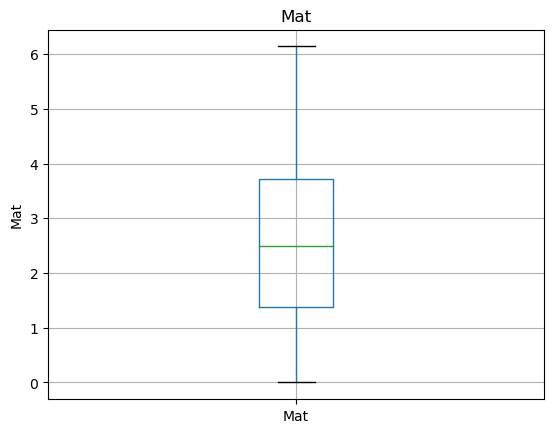

In [34]:
for feature in columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

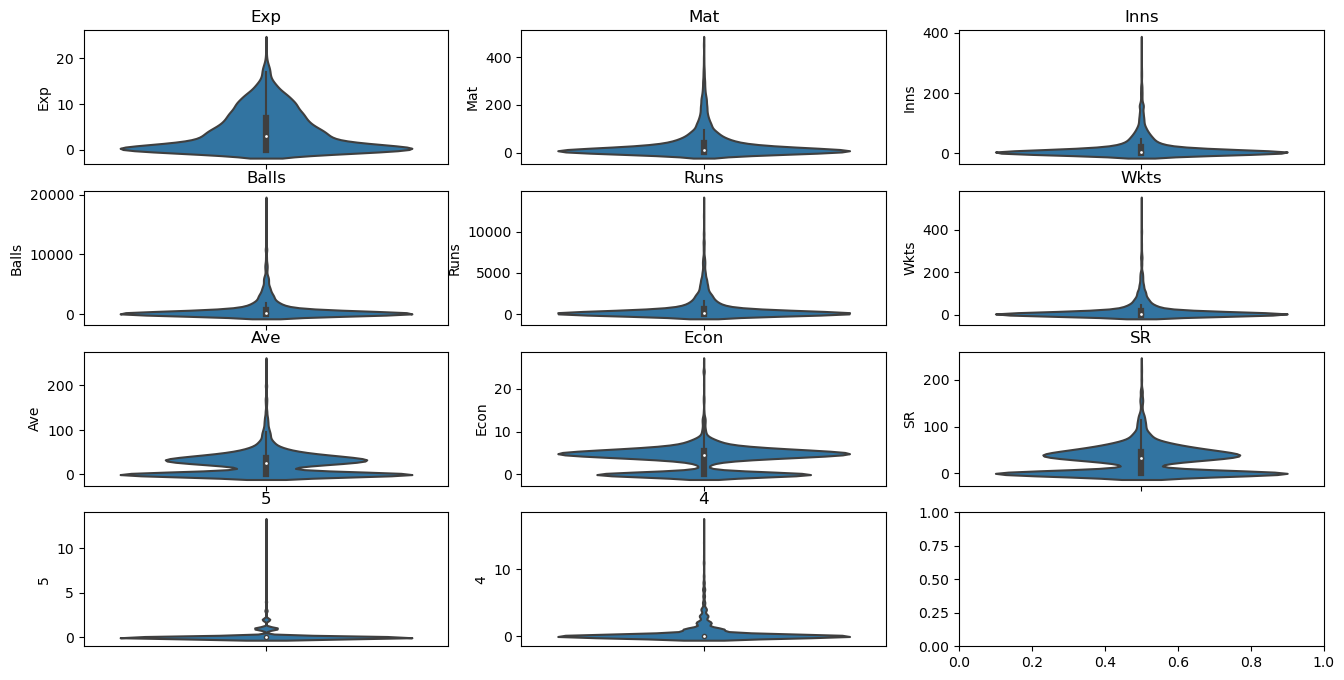

In [36]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df['Balls'],ax=axes[1, 0])
axes[1, 0].set_title('Balls')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df['Wkts'],ax=axes[1, 2])
axes[1, 2].set_title('Wkts')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df['Econ'],ax=axes[2, 1])
axes[2, 1].set_title('Econ')
s=sns.violinplot(y=df['SR'],ax=axes[2, 2])
axes[2, 2].set_title('SR')
s=sns.violinplot(y=df['5'],ax=axes[3, 0])
axes[3, 0].set_title('5')
s=sns.violinplot(y=df['4'],ax=axes[3, 1])
axes[3, 1].set_title('4')
plt.show()

Plot histogram for each continous variables

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\164846879.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\164846879.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\164846879.p

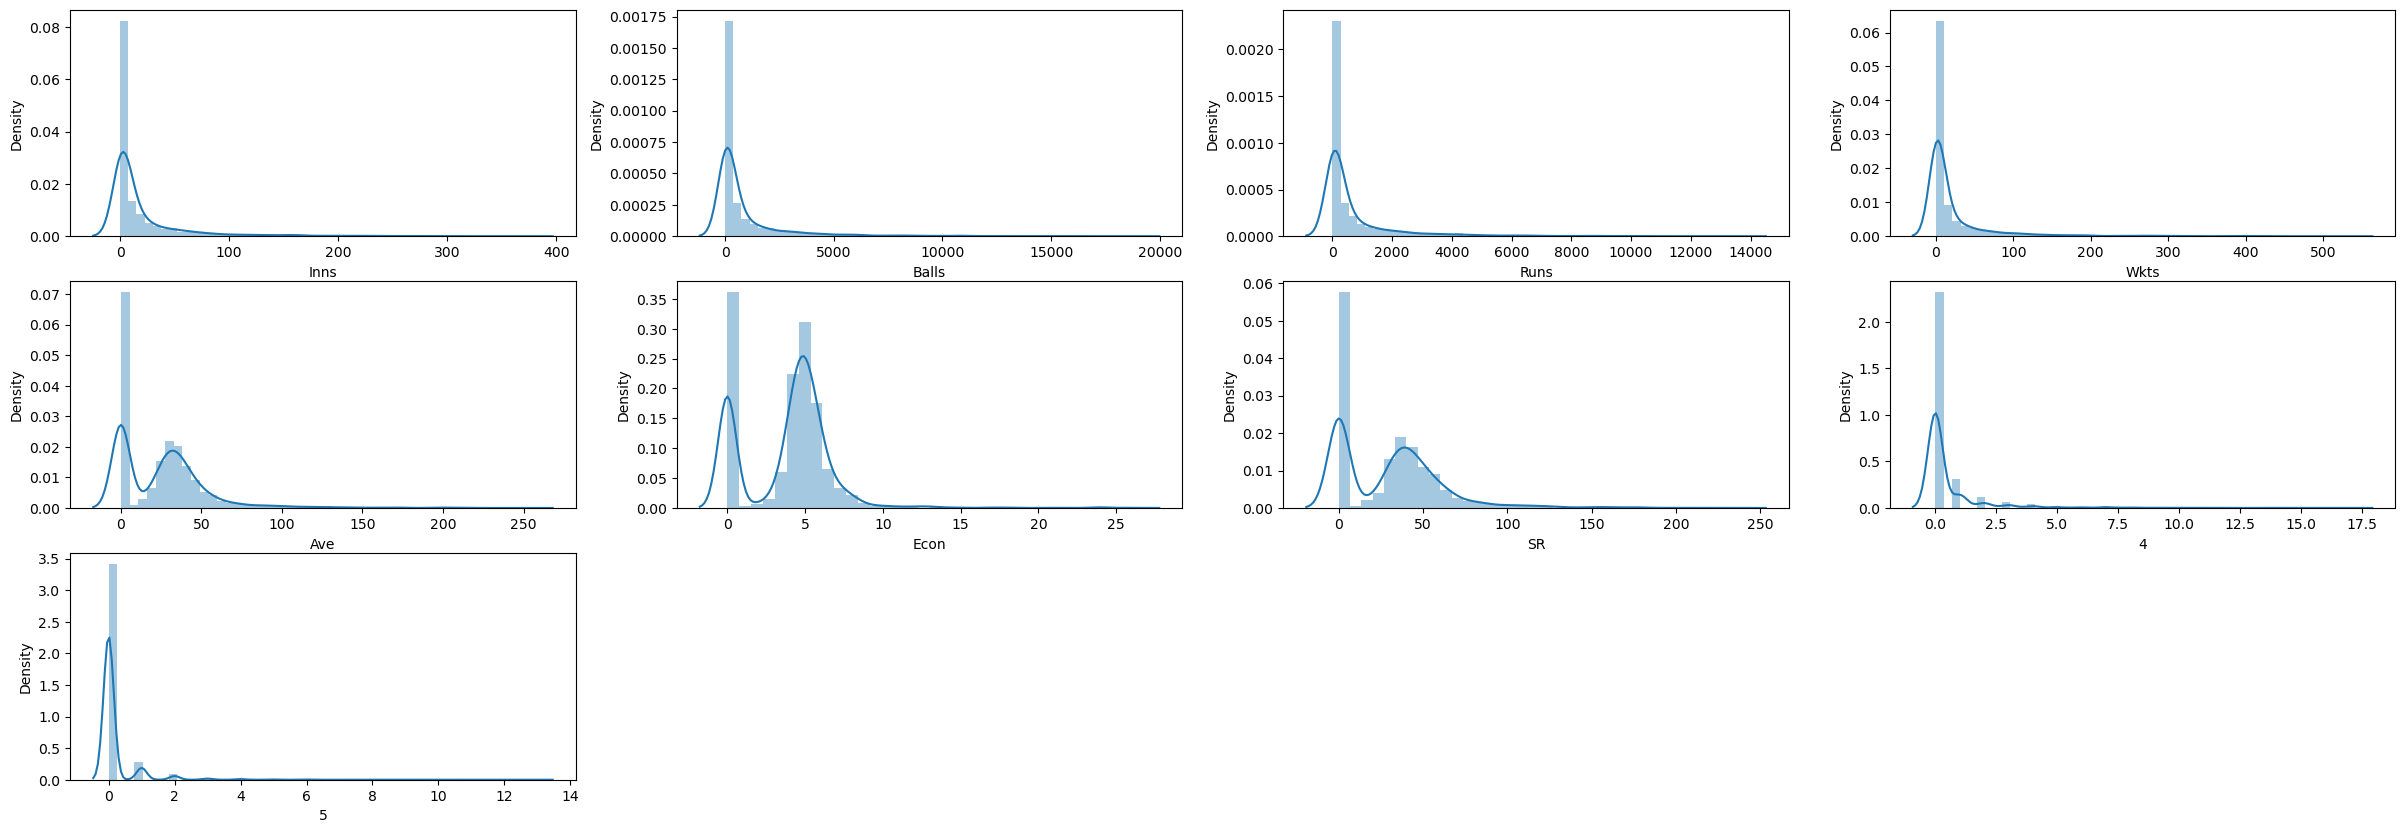

In [37]:
plt.figure(figsize = (30,10))
#features=[ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
for i in enumerate(numeric_columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]])

Percentile Capping (Winsorization) for outliers handling

In [38]:
for column in columns:
    Q3 = df.Mat.quantile(0.99)
    Q1 = df.Mat.quantile(0.01)
    df[column][df[column]<=Q1]=Q1
    df[column][df[column]>=Q3]=Q3

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\1435898262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column]<=Q1]=Q1
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\1435898262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column]>=Q3]=Q3


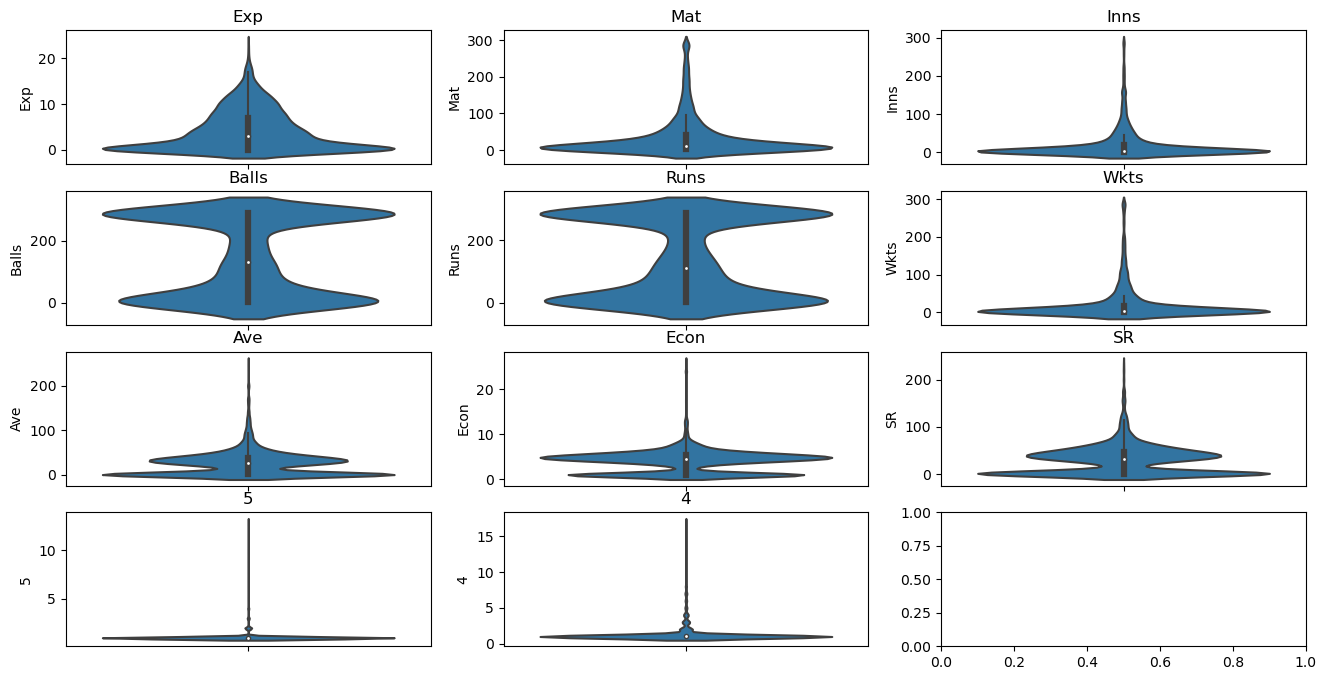

In [41]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df['Balls'],ax=axes[1, 0])
axes[1, 0].set_title('Balls')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df['Wkts'],ax=axes[1, 2])
axes[1, 2].set_title('Wkts')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df['Econ'],ax=axes[2, 1])
axes[2, 1].set_title('Econ')
s=sns.violinplot(y=df['SR'],ax=axes[2, 2])
axes[2, 2].set_title('SR')
s=sns.violinplot(y=df['5'],ax=axes[3, 0])
axes[3, 0].set_title('5')
s=sns.violinplot(y=df['4'],ax=axes[3, 1])
axes[3, 1].set_title('4')
plt.show()

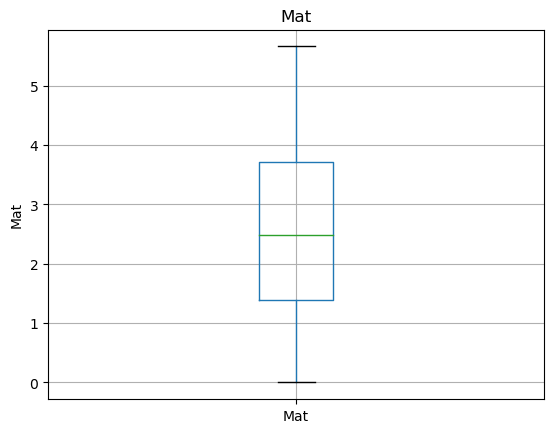

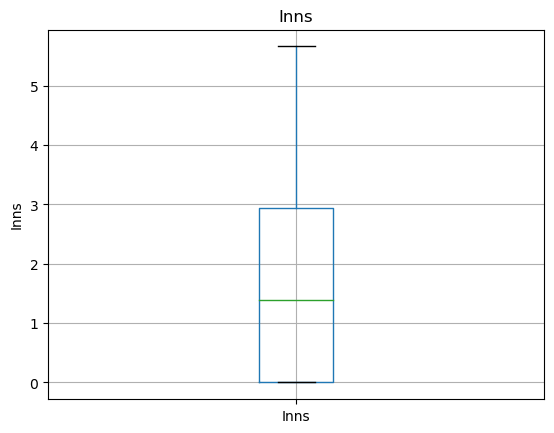

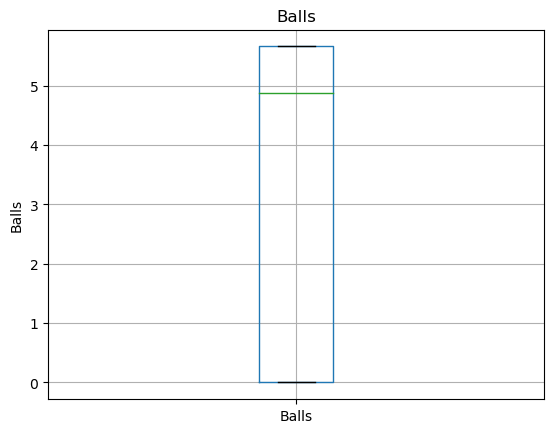

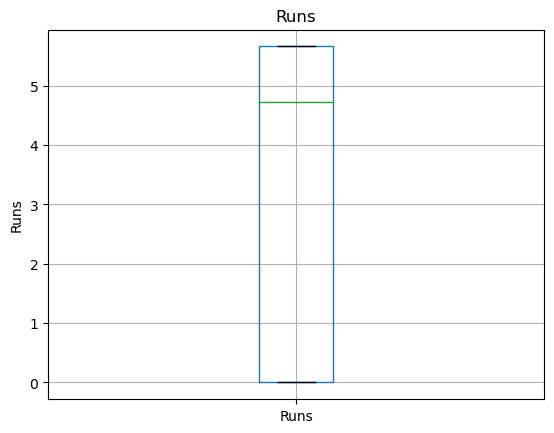

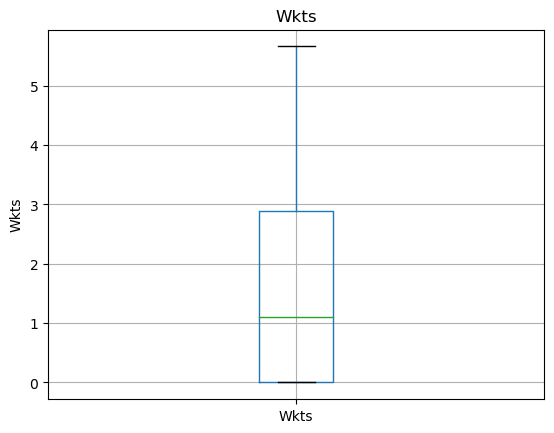

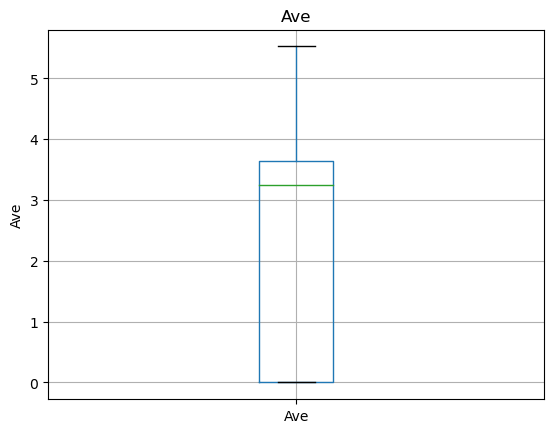

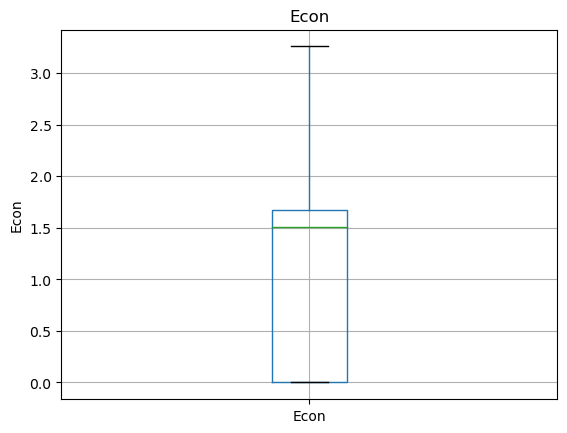

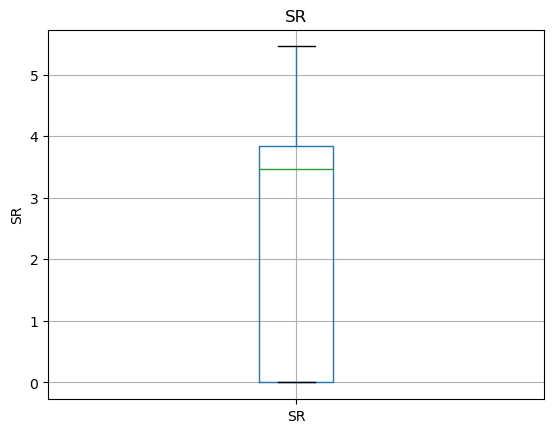

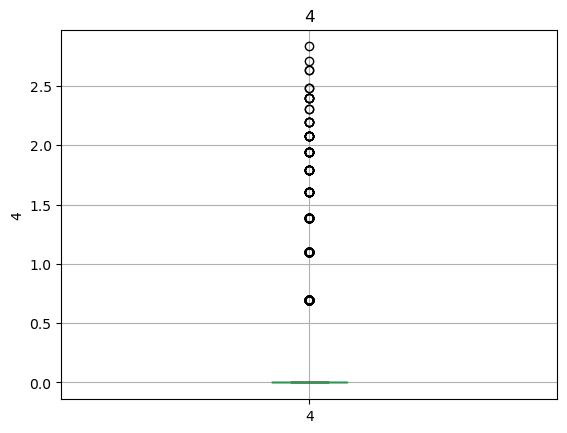

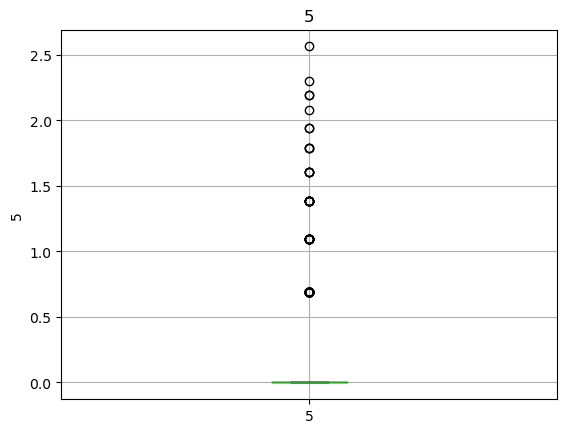

In [42]:
for feature in columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

1. What is the distribution of bowling averages among different players?
2.What is the average number of wickets taken by players with bowling averages  below a certain threshold?

3. How do the economy rates vary among different bowlers?
4. Is there a correlation between economy rate and wickets taken?

5. What is the typical strike rate for bowlers?
6. How does the number of wickets taken correlate with the strike rate?

7. Who had the best bowling performance, and in which match did it occur?
8. How often do players achieve their best bowling performance?

9.What is the probability of a player taking a specific number of wickets in an inning?
10. Given a specific bowling average threshold, what is the probability of a player having an average below that threshold?

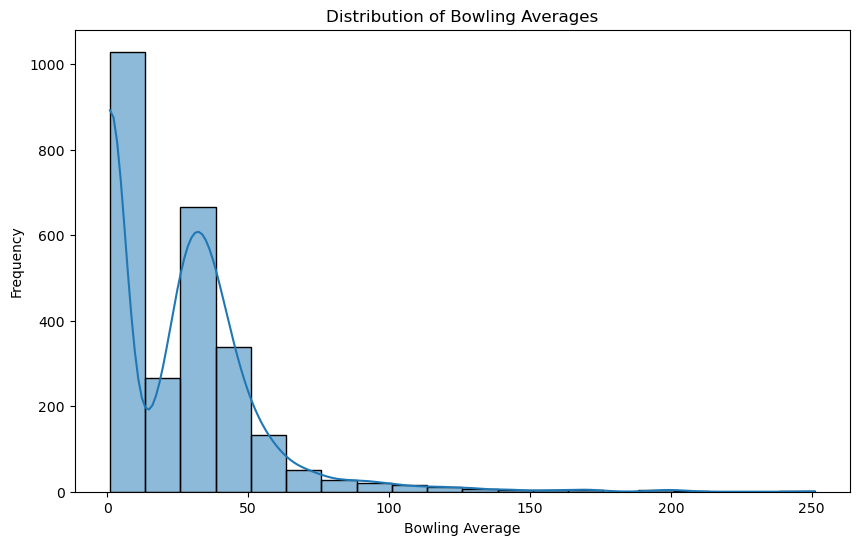

Average number of wickets for bowlers with average below 25: 7.93


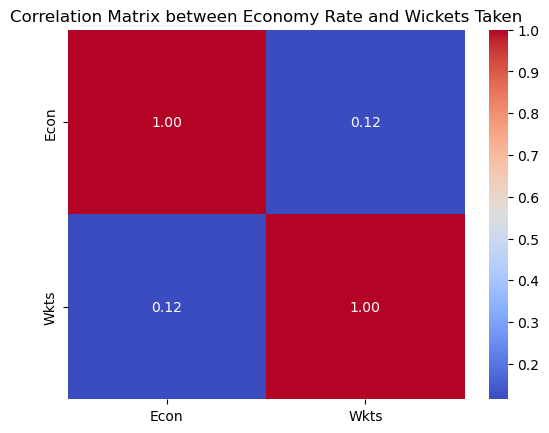

Typical strike rate for bowlers: 32.25


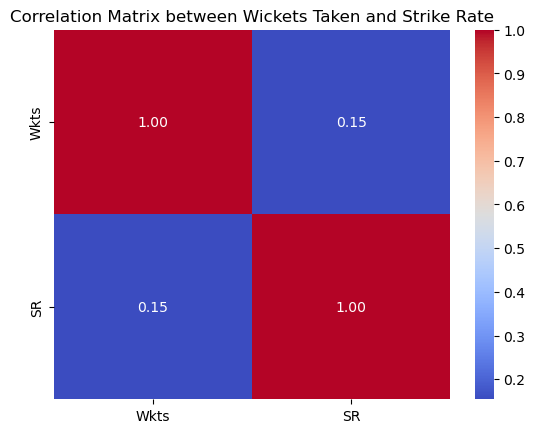

The best bowling performance was by WPUJC Vaas (Asia/SL) in match 8/19
Frequency of players achieving their best bowling performance: 986
Probability of a player taking 5 wickets in an inning: 2.63%


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

# bowling_data is your DataFrame
bowling_data = df
bowling_data[['Ave', 'Wkts', 'SR', 'Econ']] = bowling_data[['Ave', 'Wkts', 'SR', 'Econ']].apply(pd.to_numeric, errors='coerce')

# 1. Distribution of Bowling Averages among Different Players
plt.figure(figsize=(10, 6))
sns.histplot(bowling_data['Ave'], bins=20, kde=True)
plt.title('Distribution of Bowling Averages')
plt.xlabel('Bowling Average')
plt.ylabel('Frequency')
plt.show()

# 2. Average Number of Wickets for Bowlers with Bowling Averages below a Certain Threshold
average_threshold = 25  # Set your threshold
below_threshold_data = bowling_data[bowling_data['Ave'] < average_threshold]
average_wickets_below_threshold = below_threshold_data['Wkts'].mean()
print(f"Average number of wickets for bowlers with average below {average_threshold}: {average_wickets_below_threshold:.2f}")


# 4. Correlation between Economy Rate and Wickets Taken
correlation_matrix = bowling_data[['Econ', 'Wkts']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Economy Rate and Wickets Taken')
plt.show()

# 5. Typical Strike Rate for Bowlers
typical_strike_rate = bowling_data['SR'].median()
print(f"Typical strike rate for bowlers: {typical_strike_rate:.2f}")

# 6. Correlation between Number of Wickets Taken and Strike Rate
correlation_matrix_wickets_sr = bowling_data[['Wkts', 'SR']].corr()
sns.heatmap(correlation_matrix_wickets_sr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Wickets Taken and Strike Rate')
plt.show()

# 7. Best Bowling Performance and Match
# Find the index of the row with the maximum 'BBI' value
bowling_data['BBI_numeric'] = bowling_data['BBI'].str.extract('(\d+)').astype(float)
best_bowling_index = bowling_data['BBI_numeric'].idxmax()

# Display the information about the best bowling performance
best_bowling_player = bowling_data.loc[best_bowling_index, 'Player']
best_bowling_match = bowling_data.loc[best_bowling_index, 'BBI']
print(f"The best bowling performance was by {best_bowling_player} in match {best_bowling_match}")

# Remove the temporary column 'BBI_numeric'
bowling_data = bowling_data.drop('BBI_numeric', axis=1)

# 8. Frequency of Best Bowling Performance
best_bowling_count = bowling_data['BBI'].value_counts().max()
print(f"Frequency of players achieving their best bowling performance: {best_bowling_count}")

# 9. Probability of a Player Taking a Specific Number of Wickets in an Inning
specific_wickets = 5  
probability_specific_wickets = len(bowling_data[bowling_data['Wkts'] == specific_wickets]) / len(bowling_data)
print(f"Probability of a player taking {specific_wickets} wickets in an inning: {probability_specific_wickets:.2%}")

